# Loan Application Status Prediction Project 9

### Problem Statement

A loan is a bank's main source of revenue. The profits earned through loans account for most of the bank's profits. Even though the bank accepts the loan following a lengthy verification and testimony process, there is no guarantee that the chosen candidate is the right one. When done manually, this operation takes a long time. We can predict whether a given hopeful is safe or not, and the entire testimonial process is automated using machine literacy. Loan Prognostic is beneficial to both bank retainers and hopefuls.
    The Bank wants to automate the loan eligibility process (real-time) based on customer detail provided while filling out online application forms. These details are Gender, Marital Status, Education, number of Dependents, Income, Loan Amount, Credit History, and others.

To automate this process, they have provided a dataset to identify the customer segments that are eligible for loan amounts so that they can specifically target these customers.



### Prediction

As mentioned above this is a Binary Classification problem in which we need to predict our Target label which is “Loan Status”.

Loan status can have two values: Yes or No.

- Yes: if the loan is approved

- No: if the loan is not approved

So using the training dataset we will train our model and try to predict our target column that is “Loan Status” on the test dataset.

### Importing the Dataset:

In [1]:
#Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the data file
df = pd.read_csv(r"C:\Users\RSarkar\Desktop\loan_prediction.csv") 

df #diplaying the dataset with first 5 and last 5 

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
1               1.0         Rural           N  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
..              ...           ...         ...  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N  

[614 rows x 13 columns]

In [3]:
#Let's see the shape of dataset
df.shape 

(614, 13)

In [4]:
df.columns #to see the columns names

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
 # first 5 row of dataset
    
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

# EDA

In [6]:
# Let's check the NULL values in dataset
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We see that there are some null values in the data set,the columns: 

gender has 13 nulls, 
married and unmarried has 3, 
dependents 15,
self employed 32,
LoanAmount 22, 
Loan_Amount_Term 14,
Credit_History 50  all have null values, 

The problem with replacing them with mean,median or mode is the nature of the columns , we see that these are really personal details belonging to the loan applicants so if we replace them the model with become unreliable, so the next best thing is to remove them from the dataset


In [7]:
#Get the information of Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


We have rechecked again and found the same null values as we saw and we will have to remove them to proceed further

In [8]:
# Checking for Duplicate Values

df.drop_duplicates(inplace=True)

In [9]:
df.shape

(614, 13)

We see there are no duplicate values so moving on to removing the nulls

In [10]:
df = df.dropna()
df

Loan_ID  Gender Married Dependents     Education Self_Employed  \
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
5    LP001011    Male     Yes          2      Graduate           Yes   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
5               5417             4196.0       267.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
1               1.0         Rural           N  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
5               1.0         Urban           Y  
..              ...           ...         ...  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N  

[480 rows x 13 columns]

In [11]:
Data_loss = ((614-480)/614)*100

In [12]:
Data_loss

21.824104234527688

We see that after we removed the null values we end up with 480 rows and the data lost is 21.83 approx , which is slightly high but as we cant do anything about the data and we cant proceed with model building with null we have removed

In [13]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
# Check the datatypes of the columns
df.dtypes 

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Observations:-

- we have 8 object columns in the dataset which we will need to treat and


- we see that the target or Label which is Loan_Status is also having categorical data and needs to be treated  


- we see that Loan ID, Load Amount and Loan Term are all related to the application and status is outcome and the rest are feature of applicants
 

In [15]:
df.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       480.000000         480.000000  480.000000        480.000000   
mean       5364.231250        1581.093583  144.735417        342.050000   
std        5668.251251        2617.692267   80.508164         65.212401   
min         150.000000           0.000000    9.000000         36.000000   
25%        2898.750000           0.000000  100.000000        360.000000   
50%        3859.000000        1084.500000  128.000000        360.000000   
75%        5852.500000        2253.250000  170.000000        360.000000   
max       81000.000000       33837.000000  600.000000        480.000000   

       Credit_History  
count      480.000000  
mean         0.854167  
std          0.353307  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

Observations:-

    - there are 5 numerical columns in the dataset
    - the ApplicantIncome & CoapplicantIncome have too much skewness and our standard deviation is showing higher than the mean which is not good.
    - the  columns shows the 75% quantile is 5852 and 2253 and max is 81000 & 33837 that shows that there are ouliers in the columns
    - the credit_history is categorical in nature having 2 classes 0 and 1 only.

In [16]:
# Checking to see the unique values in the columns
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [17]:
# we see the total unique values in the columns is the total no of rows which means the column is unique in all

df['Loan_ID'].nunique()

480

In [18]:
# to see the unique values in Gender

df['Gender'].unique() 

array(['Male', 'Female'], dtype=object)

In [19]:
#we see two classes here as well in this categorical column

df['Married'].unique() 

array(['Yes', 'No'], dtype=object)

In [20]:
#we see 4 unique values here for Dependents 

df['Dependents'].unique() 

array(['1', '0', '2', '3+'], dtype=object)

In [21]:
# we see the 2 categories in Education column

df['Education'].unique() 

array(['Graduate', 'Not Graduate'], dtype=object)

In [22]:
# we have 2 categorical values in this column

df['Self_Employed'].unique() 

array(['No', 'Yes'], dtype=object)

In [23]:
# we have 405 different values here and they are continuos in nature

df['ApplicantIncome'].nunique() 

405

In [24]:
df['CoapplicantIncome'].nunique() # there are 232 different values here and they are continuos in nature


232

In [25]:
df['LoanAmount'].nunique() # we can see 186 values of LoanAmount here

186

In [26]:
df['Loan_Amount_Term'].unique()   #this is again a categorical column having the 

array([360., 120., 180.,  60., 300., 480., 240.,  36.,  84.])

In [27]:
df['Credit_History'].unique() #this is a column which says if the applicant has a credit history or not

array([1., 0.])

In [28]:
df['Property_Area'].unique() #this column tells us where the prperty is in whether in urban ,semiurban or rural

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

In [29]:
df['Loan_Status'].unique() # This is the target column where we see the ones who got loan and those tab have not

array(['N', 'Y'], dtype=object)

In [30]:
# Checking the unique values in each column

for col in df:
    print(df[col].nunique(),'\n')

480 

2 

2 

4 

2 

2 

405 

232 

186 

9 

2 

3 

2 



Observations made in individual columns cells above . Overall there is a huge variation in the type of data , but the columns are all having pretty straightforward contents as we can make out what each means except the id which is unique
    

In [31]:
# Checking to see if any of the values in Target  is white spaces

df.loc[df['Loan_Status'] == " "]

Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: []

Great!! the target have no whitespace, so we can move ahead

### Visualization of the Data

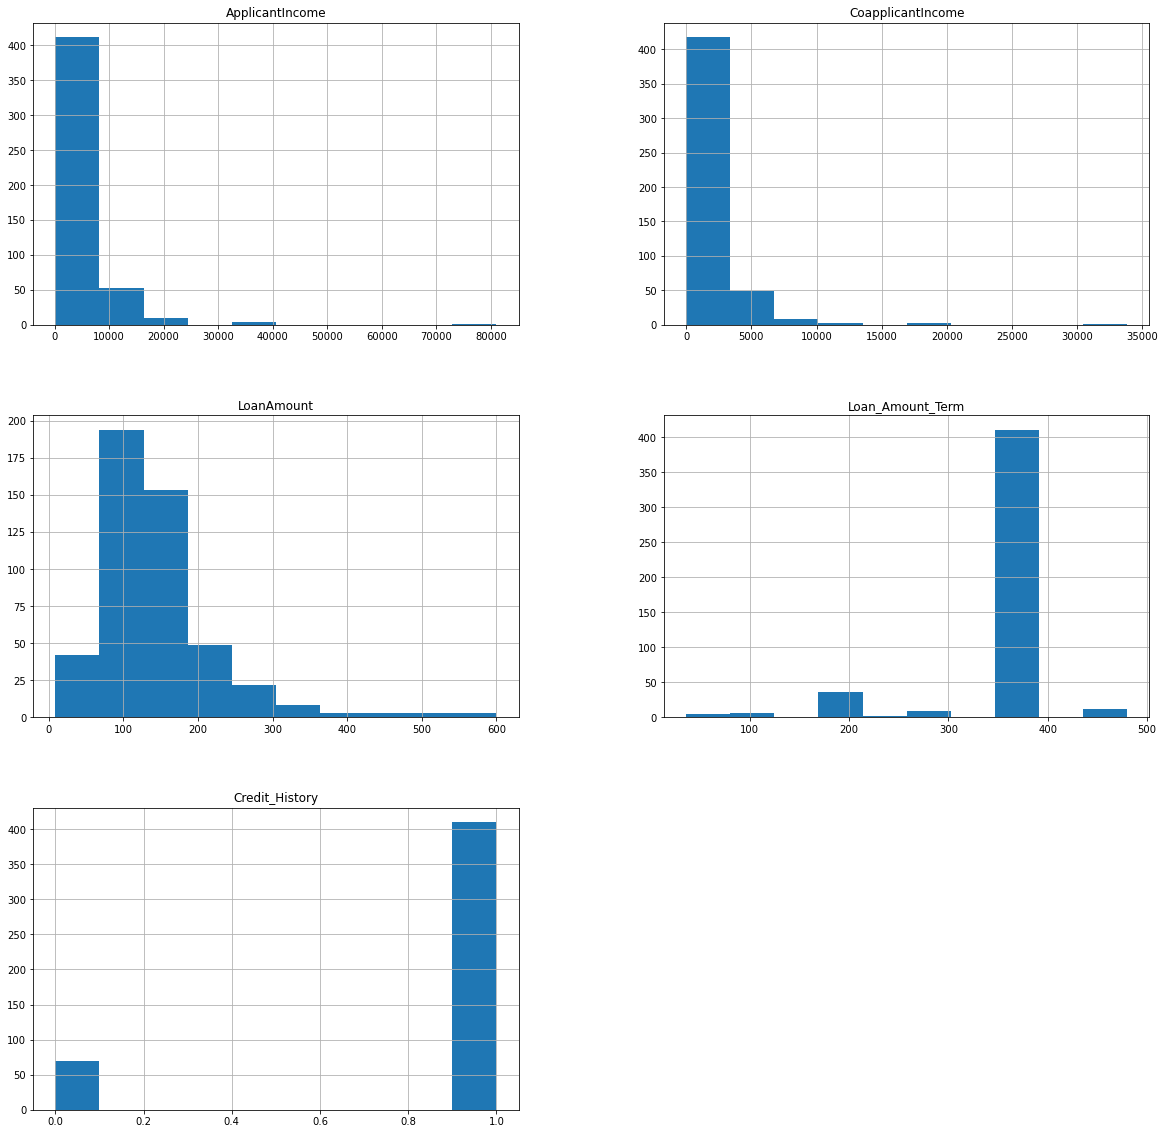

In [32]:
import matplotlib.pyplot as plt
df.hist(figsize=(20,20))
plt.show()

To understand properly we need to review each feature individually but this graph is just for showing the trend with histplot only numeric features shown

### Splitting the columns with categorical and numerica data

In [33]:
# We will categorise numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 5 numerical features : ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

We have 8 categorical features : ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [34]:
df_visualization_continuous=df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']].copy()

In [35]:
df_visualization_nominal=df[['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']]

### Visualization of the distribution of the continuous value of the float and int columns.

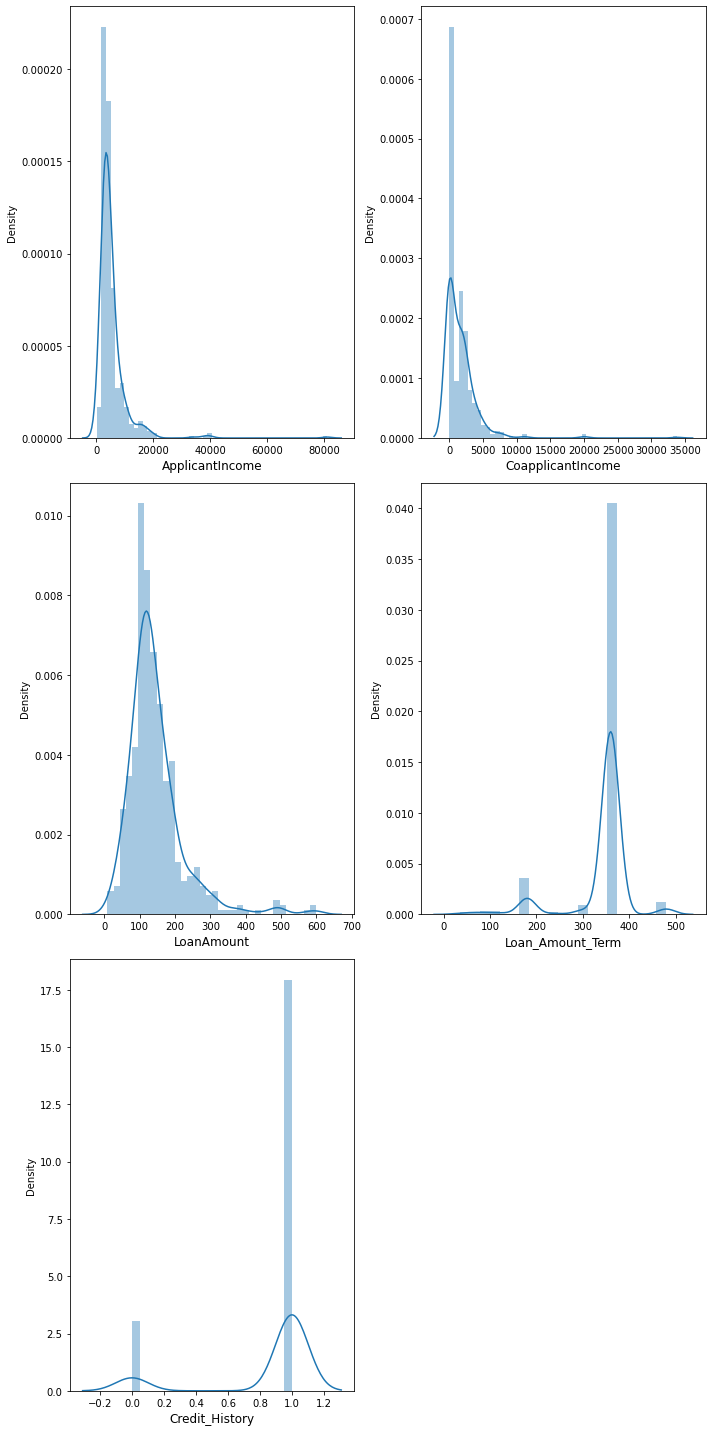

In [36]:
plt.figure(figsize =(10,20), facecolor = 'white')
plotnumber = 1

for column in df_visualization_continuous:
    if plotnumber <=5:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(df_visualization_continuous[column])
        plt.xlabel(column,fontsize = 12)
        
    plotnumber +=1
plt.tight_layout()

#### Observations :-
    
   - We see that the columns ApplicantIncome and CoapplicantIncome & LoanAmount are right skewed and need to be treated
   
   - we see the columns Loan_Amount_term and Credit History are categorical data

### Treating the target variable where we give Y= 1 & N= 0

In [37]:
df['Loan_Status'] = df['Loan_Status'].factorize(['Y', 'N' ])[0]

In [38]:
df

Loan_ID  Gender Married Dependents     Education Self_Employed  \
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
5    LP001011    Male     Yes          2      Graduate           Yes   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
5               5417             4196.0       267.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area  Loan_Status  
1               1.0         Rural            0  
2               1.0         Urban            1  
3               1.0         Urban            1  
4               1.0         Urban            1  
5               1.0         Urban            1  
..              ...           ...          ...  
609             1.0         Rural            1  
610             1.0         Rural            1  
611             1.0         Urban            1  
612             1.0         Urban            1  
613             0.0     Semiurban            0  

[480 rows x 13 columns]

### Visualizing the Target Variable 

Y    332
N    148
Name: Loan_Status, dtype: int64


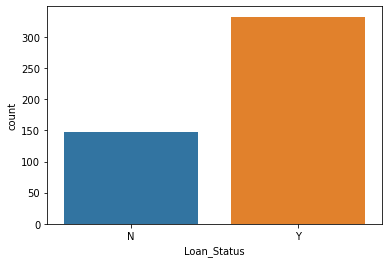

In [39]:
ax = sns.countplot(x='Loan_Status',data = df_visualization_nominal)
print(df_visualization_nominal['Loan_Status'].value_counts())

1    332
0    148
Name: Loan_Status, dtype: int64


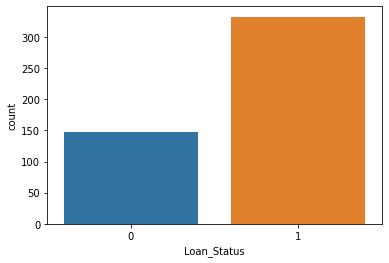

In [40]:
ax = sns.countplot(x='Loan_Status',data = df)
print(df['Loan_Status'].value_counts())

In [41]:
import plotly.graph_objs as go
import plotly.offline as py

less_50 = df[(df['Loan_Status'] != 0)]
more_50 = df[(df['Loan_Status'] == 0)]

trace = go.Pie(labels = ['Loan_Status is Yes', 'Loan_Status is No'], values = df['Loan_Status'].value_counts(), 
               textfont=dict(size=15),
               marker=dict(colors=['yellow','brown'], 
               line=dict(color='blue', width=2)))
layout = dict(title =  'Visualization of Distribution of Loan_Status')          
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

Observations :-

We see a huge imbalance in the label column where the applicants whose loan is approved is 69.2% and the ones whose isnt is 30.8% so we need to balance this  

### Lets graph the data for columns individually so we can make clear findings

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

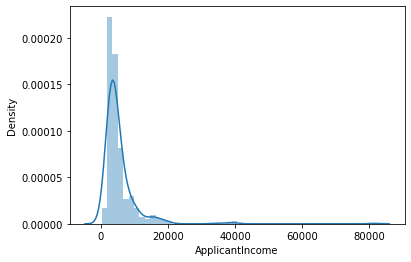

In [42]:
sns.distplot(df_visualization_continuous['ApplicantIncome'],kde=True)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

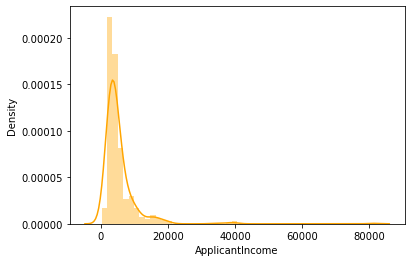

In [43]:
sns.distplot(df_visualization_continuous['ApplicantIncome'],kde=True,color='orange')

We see that the data is right skewed and we see some outliers in the dataset , we see the max range is 0-5000 approx , need to treat to get a better look at the data

<AxesSubplot:xlabel='ApplicantIncome', ylabel='count'>

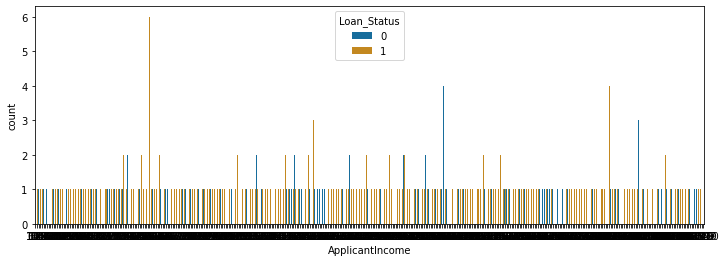

In [44]:
plt.subplots(figsize=(12,4))
sns.countplot(x="ApplicantIncome", hue="Loan_Status", data=df, palette="colorblind")

In [45]:
import plotly.express as px

plot_df=df.sort_values(by="Loan_Status")
fig=px.histogram(plot_df, x='ApplicantIncome', color='Loan_Status', 
                 opacity=0.8, histnorm='density', barmode='overlay', marginal='box',
                 color_discrete_map={'Yes': '#B9C0C9','No': '#CDBBA7'})

fig.update_layout(title_text='Distribution of ApplicantIncome by Loan_Status Status',
                  xaxis_title='ApplicantIncome, $', yaxis_title='Density',font_color='#28221D',
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0', legend_traceorder='reversed')

fig.show()

Again we see that as the data is conjusted witihn 0-10000 we are not able to pinpoint which range has more  loan status as No 

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

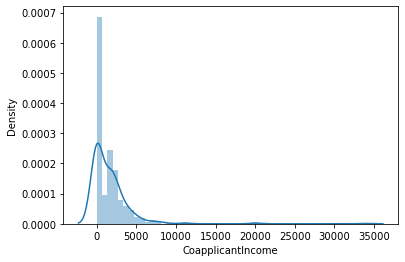

In [46]:
sns.distplot(df['CoapplicantIncome'],kde=True)

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

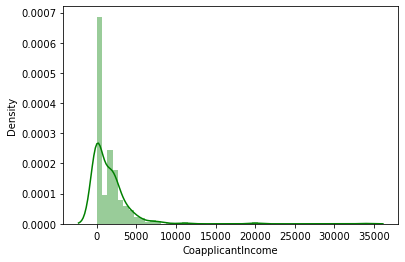

In [47]:
sns.distplot(df['CoapplicantIncome'],kde=True, color='g')

We see that the data is again right skewed and we have the max data from o to 1000 approx and we see major skewness in data

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='count'>

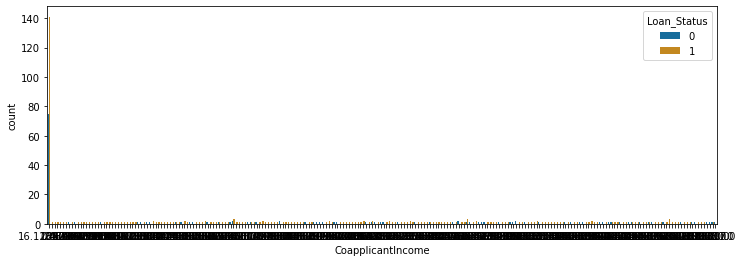

In [48]:
plt.subplots(figsize=(12,4))
sns.countplot(x="CoapplicantIncome", hue="Loan_Status", data=df, palette="colorblind")

In [49]:
plot_df=df.sort_values(by="Loan_Status")

fig=px.histogram(plot_df, x='CoapplicantIncome', color='Loan_Status', 
                 opacity=0.8, histnorm='density', barmode='overlay', marginal='box',
                 color_discrete_map={'Yes': '#B9C0C9','No': '#CDBBA7'})

fig.update_layout(title_text='Distribution of CoapplicantIncome by Loan_Status Status',
                  xaxis_title='CoapplicantIncome, $', yaxis_title='Density',font_color='#28221D',
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0', legend_traceorder='reversed')

fig.show()

We see the same issue with the applicants income as the data is conjusted due to right skewness we cant identify the range where the loan status is No

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

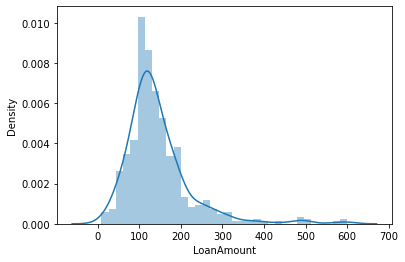

In [50]:
sns.distplot(df['LoanAmount'],kde=True)

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

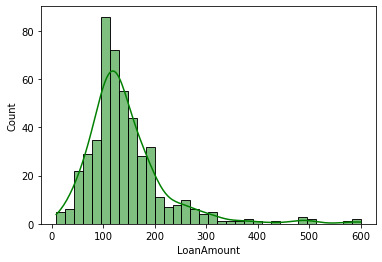

In [51]:
sns.histplot(df['LoanAmount'],kde=True, color='g')

We see that the column has somewhat normal distribution but there are some outliers in the dataset , we need to treat them 

<AxesSubplot:xlabel='LoanAmount', ylabel='count'>

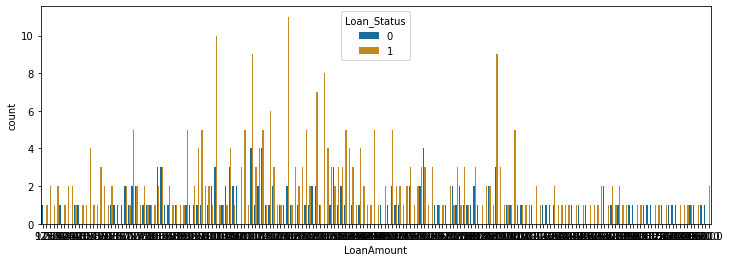

In [52]:
plt.subplots(figsize=(12,4))
sns.countplot(x="LoanAmount", hue="Loan_Status", data=df, palette="colorblind")

In [53]:
plot_df=df.sort_values(by="Loan_Status")

fig=px.histogram(plot_df, x='LoanAmount', color='Loan_Status', 
                 opacity=0.8, histnorm='density', barmode='overlay', marginal='box',
                 color_discrete_map={'Yes': '#B9C0C9','No': '#CDBBA7'})

fig.update_layout(title_text='Distribution of LoanAmount by Loan_Status Status',
                  xaxis_title='LoanAmount, $', yaxis_title='Density',font_color='#28221D',
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0', legend_traceorder='reversed')

fig.show()

We see that the higher range from 50 to 100 has the highest no loan status applicants and it seems to be evenly spread out till 300 and the higher its going more chances of load getting denied

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

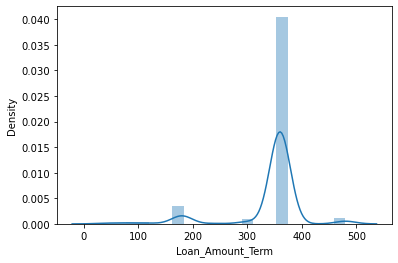

In [54]:
sns.distplot(df['Loan_Amount_Term'],kde=True,)

360.0    411
180.0     36
480.0     12
300.0      9
120.0      3
84.0       3
60.0       2
240.0      2
36.0       2
Name: Loan_Amount_Term, dtype: int64


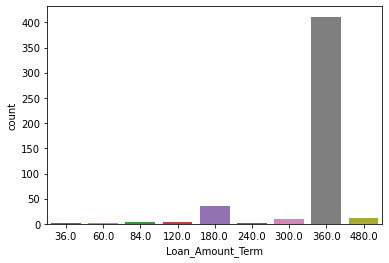

In [55]:
#Lets see the representation individually now with each column 

ax = sns.countplot(x='Loan_Amount_Term',data = df_visualization_continuous)
print(df_visualization_continuous['Loan_Amount_Term'].value_counts())

We see that the max of the applicants have opted for 360 which is in terms of months 

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

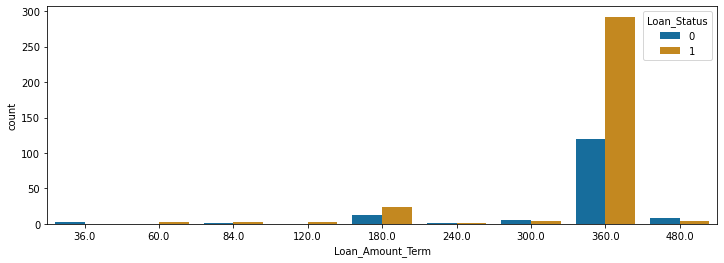

In [56]:
plt.subplots(figsize=(12,4))
sns.countplot(x="Loan_Amount_Term", hue="Loan_Status", data=df, palette="colorblind")

We see the highest denied loans also in the higest category 360 , 180 also has some denied loans, but we can't factor  a particualer reason as to why the loan is denied from this column

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

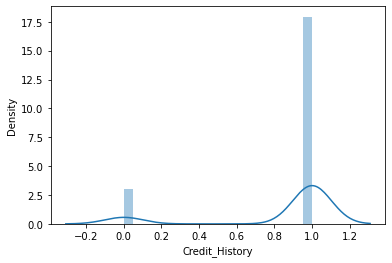

In [57]:
sns.distplot(df['Credit_History'],kde=True)

1.0    410
0.0     70
Name: Credit_History, dtype: int64


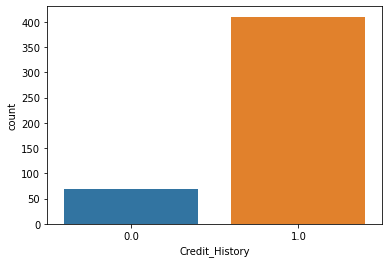

In [58]:
#Lets see the representation individually now with each column 

ax = sns.countplot(x='Credit_History',data = df_visualization_continuous)
print(df_visualization_continuous['Credit_History'].value_counts())

We see that the max of the applicants do have credit history and they are in category 1

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

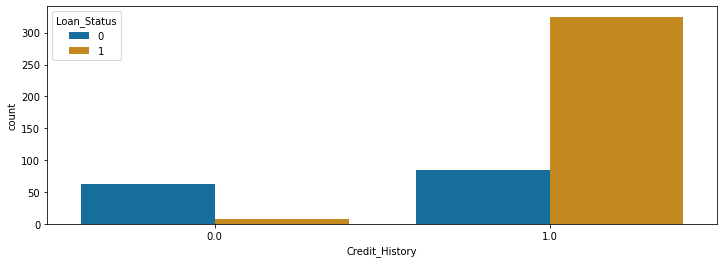

In [59]:
plt.subplots(figsize=(12,4))
sns.countplot(x="Credit_History", hue="Loan_Status", data=df, palette="colorblind")

We see that credit history plays an important role is the loan getting denied , we see people wih 0 are getting denied much much more than people having credit history

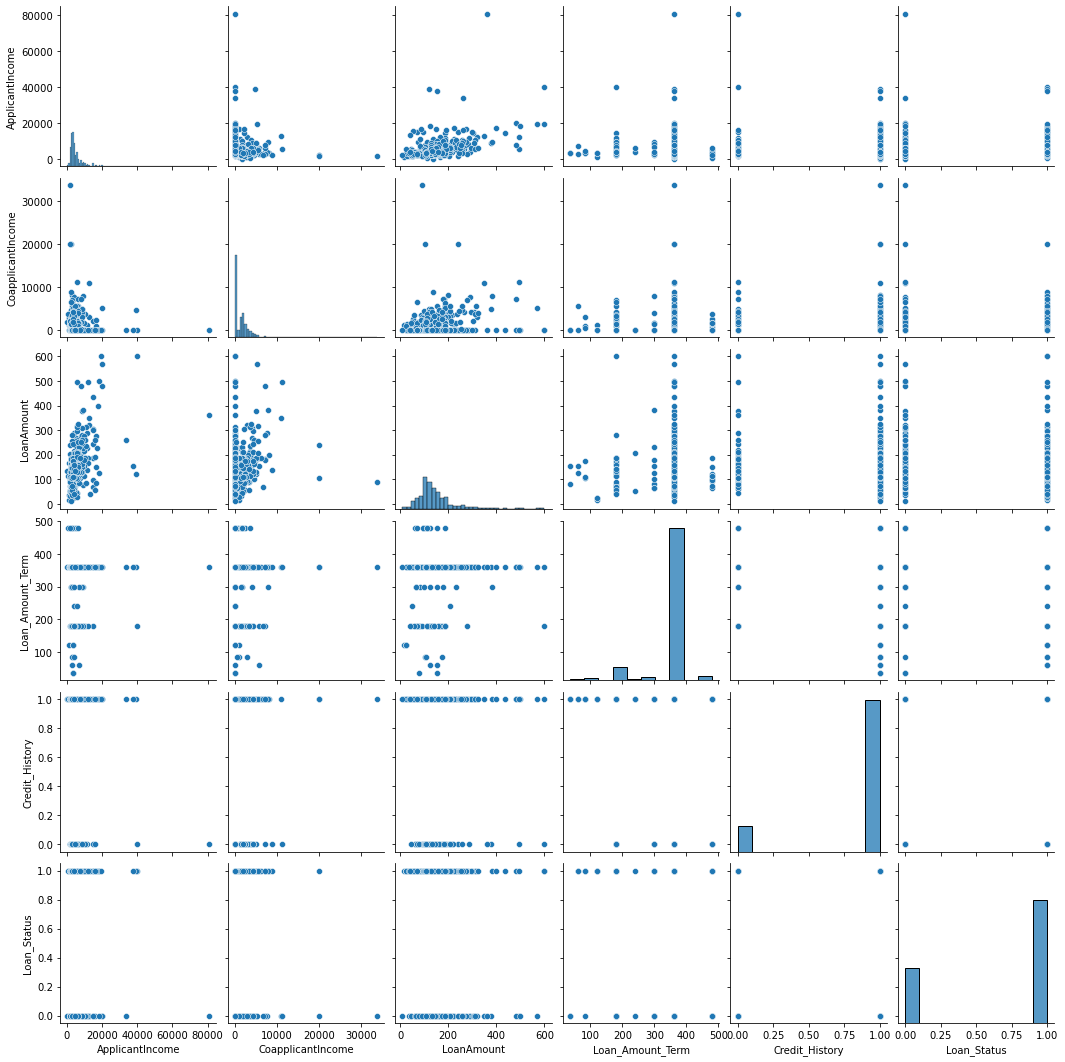

In [60]:
sns.pairplot(df)


We see a number of observation in the pairplot , but the relationship is very hard to pinpoint so we will need to plot different relationship plots to find the actual relationship between the columns

### Visualization of the categorical features

Load_ID is an index so we wont visualize than as all values are unique to each other

Male      394
Female     86
Name: Gender, dtype: int64


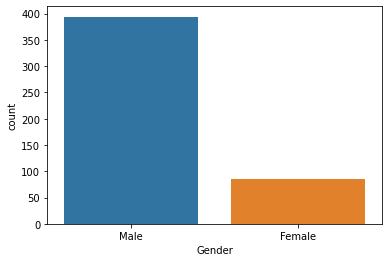

In [61]:
#Lets see the representation individually now with each column 

ax = sns.countplot(x='Gender',data = df)
print(df['Gender'].value_counts())

We see the majority is male and female is having much less @ 86 applicants

<AxesSubplot:xlabel='Gender', ylabel='count'>

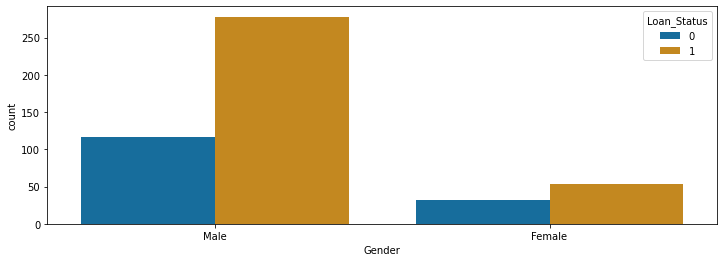

In [62]:
plt.subplots(figsize=(12,4))
sns.countplot(x="Gender", hue="Loan_Status", data=df, palette="colorblind")

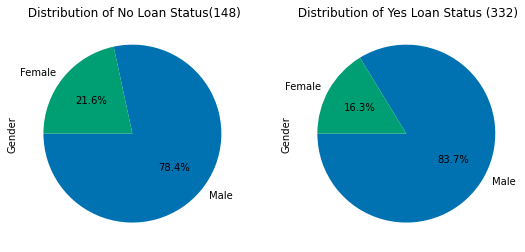

In [63]:
yes_group = df[df["Loan_Status"]== 0]
no_group = df[df["Loan_Status"]!= 0]

fig=plt.figure(figsize=(9,9))
plt.style.use('seaborn-colorblind')
fig.add_subplot(2,2,1)
yes_group["Gender"].value_counts().plot(kind="pie",  subplots=True,autopct='%1.1f%%', startangle=180)

plt.title(' Distribution of No Loan Status('+str(len(yes_group))+')');

fig.add_subplot(2,2,2)
no_group["Gender"].value_counts().plot(kind="pie",  subplots=True,autopct='%1.1f%%', startangle=180)

plt.title(' Distribution of Yes Loan Status ('+str(len(no_group))+')');

From thsi graph as well we see that since the male in the set are so hih the denied under male is equally high , we see that 21% approx of female applicants had the loan denied in NO circle

Yes    311
No     169
Name: Married, dtype: int64


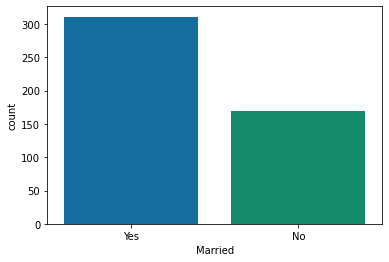

In [64]:
#Lets see the representation individually now with each column 

ax = sns.countplot(x='Married',data = df)
print(df['Married'].value_counts())

We see that the married are 311 and unmarried are 169

<AxesSubplot:xlabel='Married', ylabel='count'>

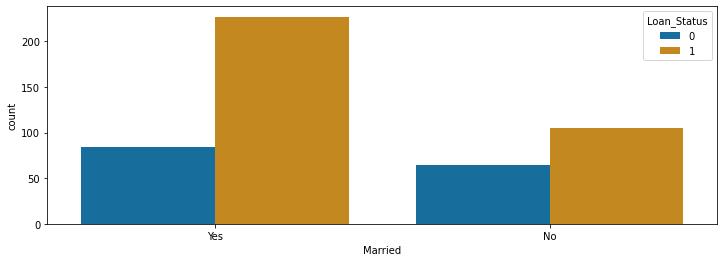

In [65]:
plt.subplots(figsize=(12,4))
sns.countplot(x="Married", hue="Loan_Status", data=df, palette="colorblind")

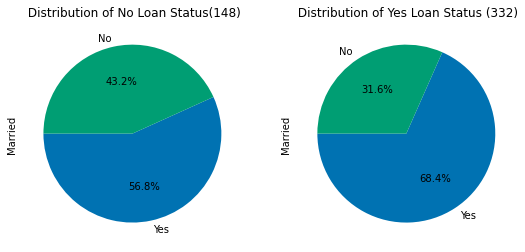

In [66]:
yes_group = df[df["Loan_Status"]== 0]
no_group = df[df["Loan_Status"]!= 0]

fig=plt.figure(figsize=(9,9))
plt.style.use('seaborn-colorblind')
fig.add_subplot(2,2,1)
yes_group["Married"].value_counts().plot(kind="pie",  subplots=True,autopct='%1.1f%%', startangle=180)

plt.title(' Distribution of No Loan Status('+str(len(yes_group))+')');

fig.add_subplot(2,2,2)
no_group["Married"].value_counts().plot(kind="pie",  subplots=True,autopct='%1.1f%%', startangle=180)

plt.title(' Distribution of Yes Loan Status ('+str(len(no_group))+')');

We see that according to the ratio the people who are unmarried seem to have more loans denied compared to the married ones and we also see a huge spike of loans applied by the married people as compared to the unmarried

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64


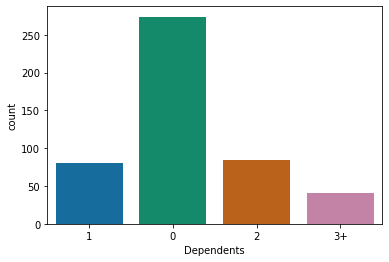

In [67]:
#Lets see the representation individually now with each column 

ax = sns.countplot(x='Dependents',data = df)
print(df['Dependents'].value_counts())

We see that most of the people hwho are applied have 0 dpendents , either because both of the husband and wife may be working or they may not married , and the least hae 3+ dependents

<AxesSubplot:xlabel='Dependents', ylabel='count'>

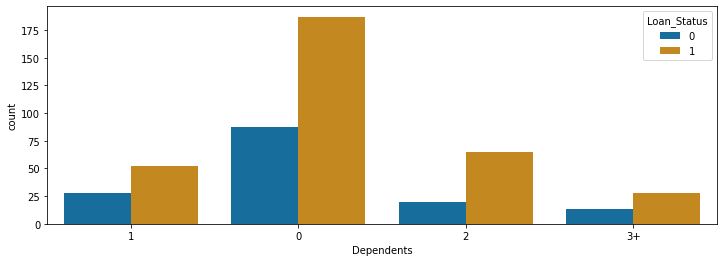

In [68]:
plt.subplots(figsize=(12,4))
sns.countplot(x="Dependents", hue="Loan_Status", data=df, palette="colorblind")

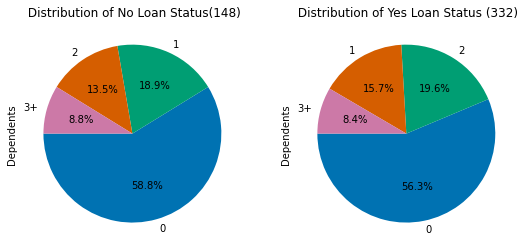

In [69]:
yes_group = df[df["Loan_Status"]== 0]
no_group = df[df["Loan_Status"]!= 0]

fig=plt.figure(figsize=(9,9))
plt.style.use('seaborn-colorblind')
fig.add_subplot(2,2,1)
yes_group["Dependents"].value_counts().plot(kind="pie",  subplots=True,autopct='%1.1f%%', startangle=180)

plt.title(' Distribution of No Loan Status('+str(len(yes_group))+')');

fig.add_subplot(2,2,2)
no_group["Dependents"].value_counts().plot(kind="pie",  subplots=True,autopct='%1.1f%%', startangle=180)

plt.title(' Distribution of Yes Loan Status ('+str(len(no_group))+')');

We see that applicants with 0 dpendents have the most denied loand form the data and 1 dependent also has a higher ration of denied loans as well 

Graduate        383
Not Graduate     97
Name: Education, dtype: int64


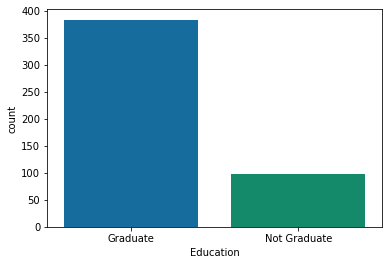

In [70]:
#Lets see the representation individually now with each column 

ax = sns.countplot(x='Education',data = df_visualization_nominal)
print(df_visualization_nominal['Education'].value_counts())

We see that the majority of the applicants are graduated

<AxesSubplot:xlabel='Education', ylabel='count'>

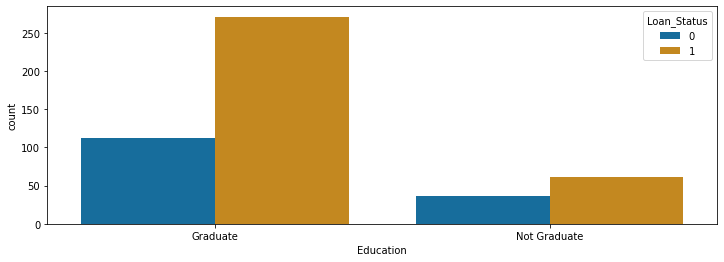

In [71]:
plt.subplots(figsize=(12,4))
sns.countplot(x="Education", hue="Loan_Status", data=df, palette="colorblind")

We see that the majority of denied loan is in graduate but according to ratio we see more loan getting denied from people who are not graduates

No     414
Yes     66
Name: Self_Employed, dtype: int64


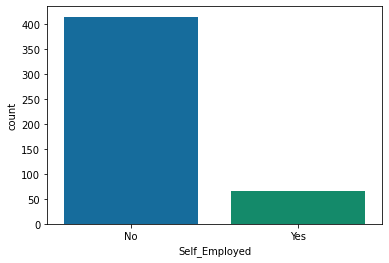

In [72]:
#Lets see the representation individually now with each column 

ax = sns.countplot(x='Self_Employed',data = df_visualization_nominal)
print(df_visualization_nominal['Self_Employed'].value_counts())

We see that the most applicats are not self employed which means they are either salaried but they are not having their own business

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

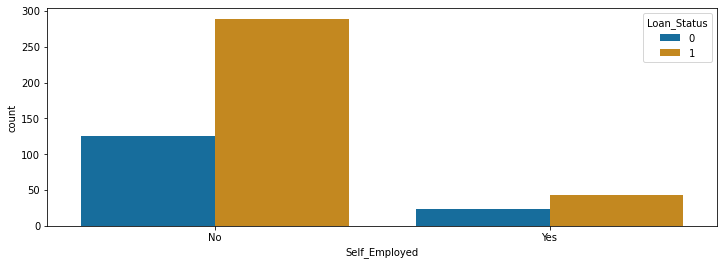

In [73]:
plt.subplots(figsize=(12,4))
sns.countplot(x="Self_Employed", hue="Loan_Status", data=df, palette="colorblind")

We see that the max denied loan is in not self employed but in ratio we see more self employed people loans being denied from the denied ones

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64


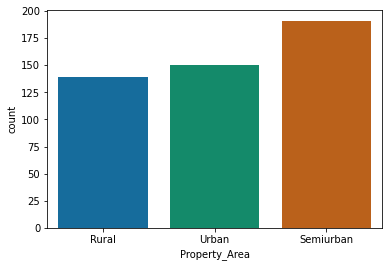

In [74]:
#Lets see the representation individually now with each column 

ax = sns.countplot(x='Property_Area',data = df_visualization_nominal)
print(df_visualization_nominal['Property_Area'].value_counts())

We see that the majority of the people are from semi urban areas and 2nd highest is urban areas

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

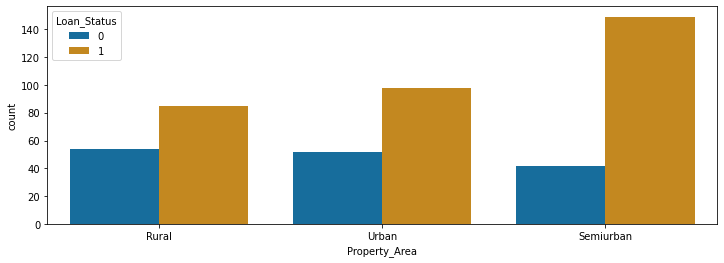

In [75]:
plt.subplots(figsize=(12,4))
sns.countplot(x="Property_Area", hue="Loan_Status", data=df, palette="colorblind")

We see that among the 23 if we are to compare the ratio, the rurual applicants loans are getting denied more as well as the urban , and the semi-urban are not getting as denied as the rest

### Encoding the categorical Features to numerical features

In [76]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [77]:
for i in df.columns:
    if df[i].dtypes == "object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))


In [78]:
df

Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
1          0       1        1           1          0              0   
2          1       1        1           0          0              1   
3          2       1        1           0          1              0   
4          3       1        0           0          0              0   
5          4       1        1           2          0              1   
..       ...     ...      ...         ...        ...            ...   
609      475       0        0           0          0              0   
610      476       1        1           3          0              0   
611      477       1        1           1          0              0   
612      478       1        1           2          0              0   
613      479       0        0           0          0              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
5               5417             4196.0       267.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History  Property_Area  Loan_Status  
1               1.0              0            0  
2               1.0              2            1  
3               1.0              2            1  
4               1.0              2            1  
5               1.0              2            1  
..              ...            ...          ...  
609             1.0              0            1  
610             1.0              0            1  
611             1.0              2            1  
612             1.0              2            1  
613             0.0              1            0  

[480 rows x 13 columns]

In [79]:
df.dtypes

Loan_ID                int32
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int64
dtype: object

In [80]:
# Checking the unique values in each column

for col in df:
    print(df[col].nunique(),'\n')

480 

2 

2 

4 

2 

2 

405 

232 

186 

9 

2 

3 

2 



We have converted the categorical data to numerical data we can move ahead to the next step

### Visualizing the relationship between the features and the  target variable - Attrition

In [81]:
#Divide data into features and label

x = df.drop(columns = ['Loan_Status'])
y = df['Loan_Status']

In [82]:
x

Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
1          0       1        1           1          0              0   
2          1       1        1           0          0              1   
3          2       1        1           0          1              0   
4          3       1        0           0          0              0   
5          4       1        1           2          0              1   
..       ...     ...      ...         ...        ...            ...   
609      475       0        0           0          0              0   
610      476       1        1           3          0              0   
611      477       1        1           1          0              0   
612      478       1        1           2          0              0   
613      479       0        0           0          0              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
5               5417             4196.0       267.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History  Property_Area  
1               1.0              0  
2               1.0              2  
3               1.0              2  
4               1.0              2  
5               1.0              2  
..              ...            ...  
609             1.0              0  
610             1.0              0  
611             1.0              2  
612             1.0              2  
613             0.0              1  

[480 rows x 12 columns]

In [83]:
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

### Scatter plot

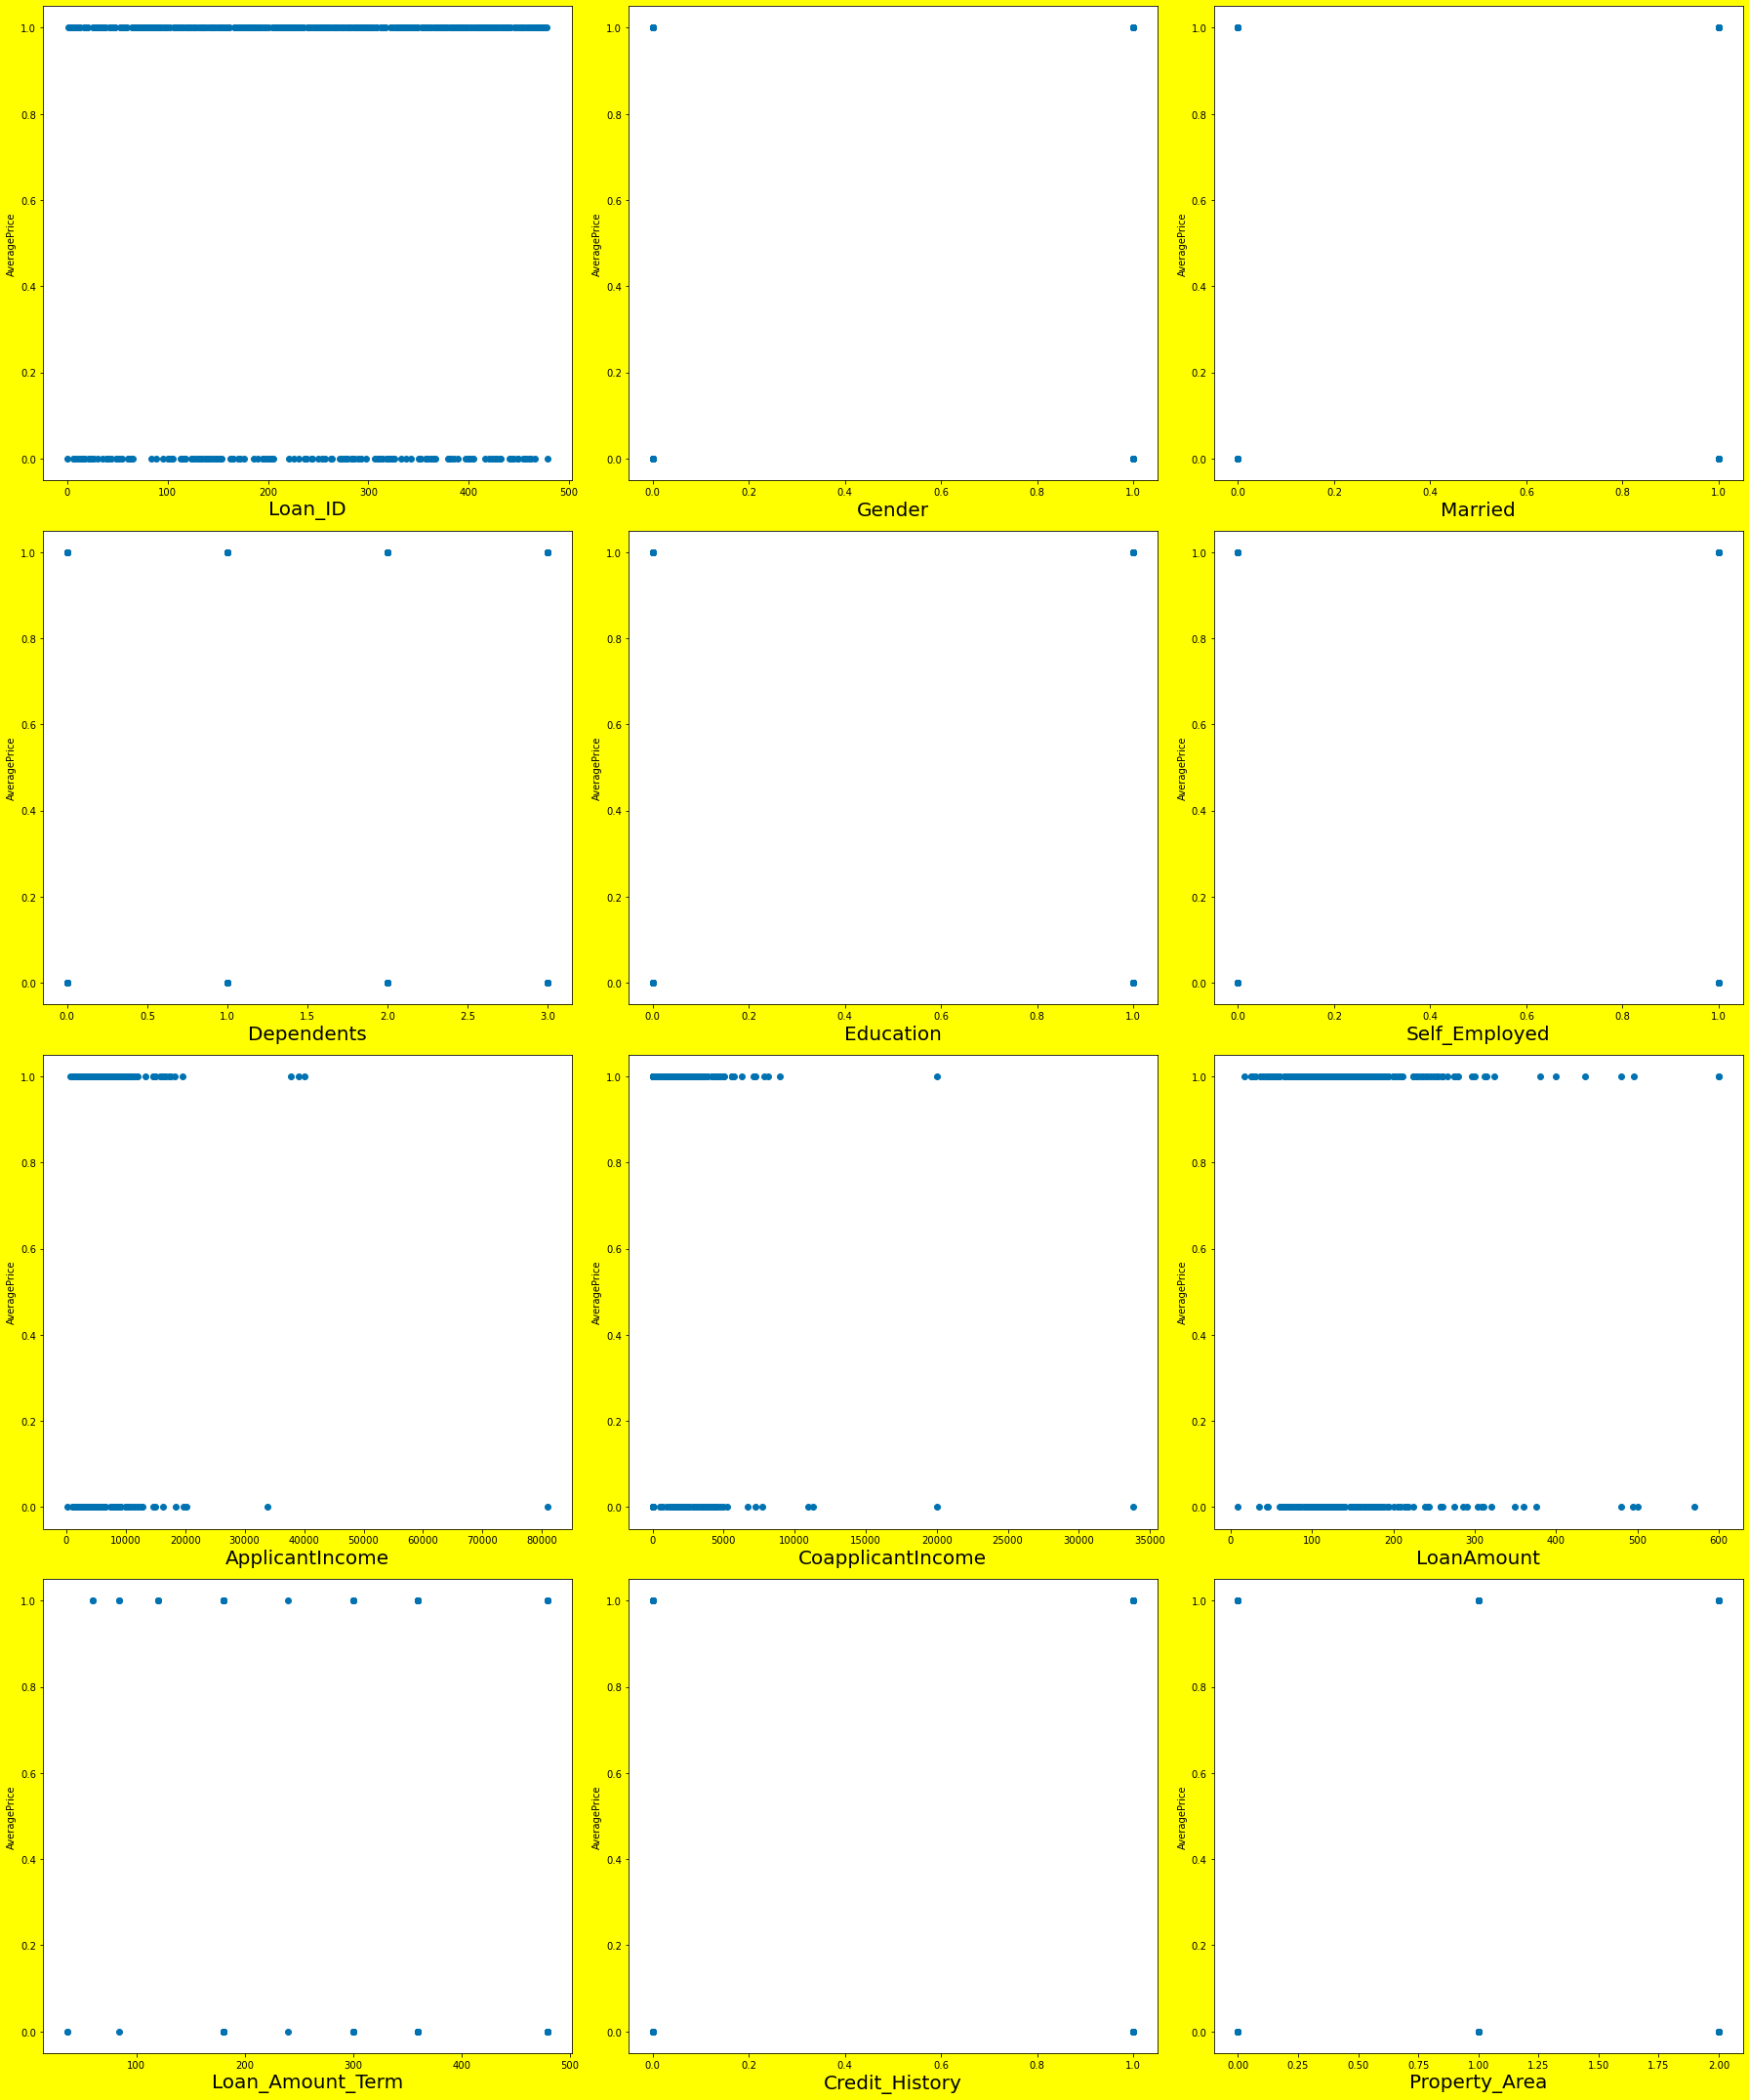

In [84]:
#Lets see how the data is distributed for every column as a whole

#Visualizing Relationship

plt.figure(figsize =(25,30), facecolor = 'yellow')
plotnumber = 1

for column in x:
    if plotnumber <=12:
        ax = plt.subplot(4,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize = 20)
        plt.ylabel('AveragePrice',fontsize = 10)
    plotnumber +=1
plt.tight_layout()


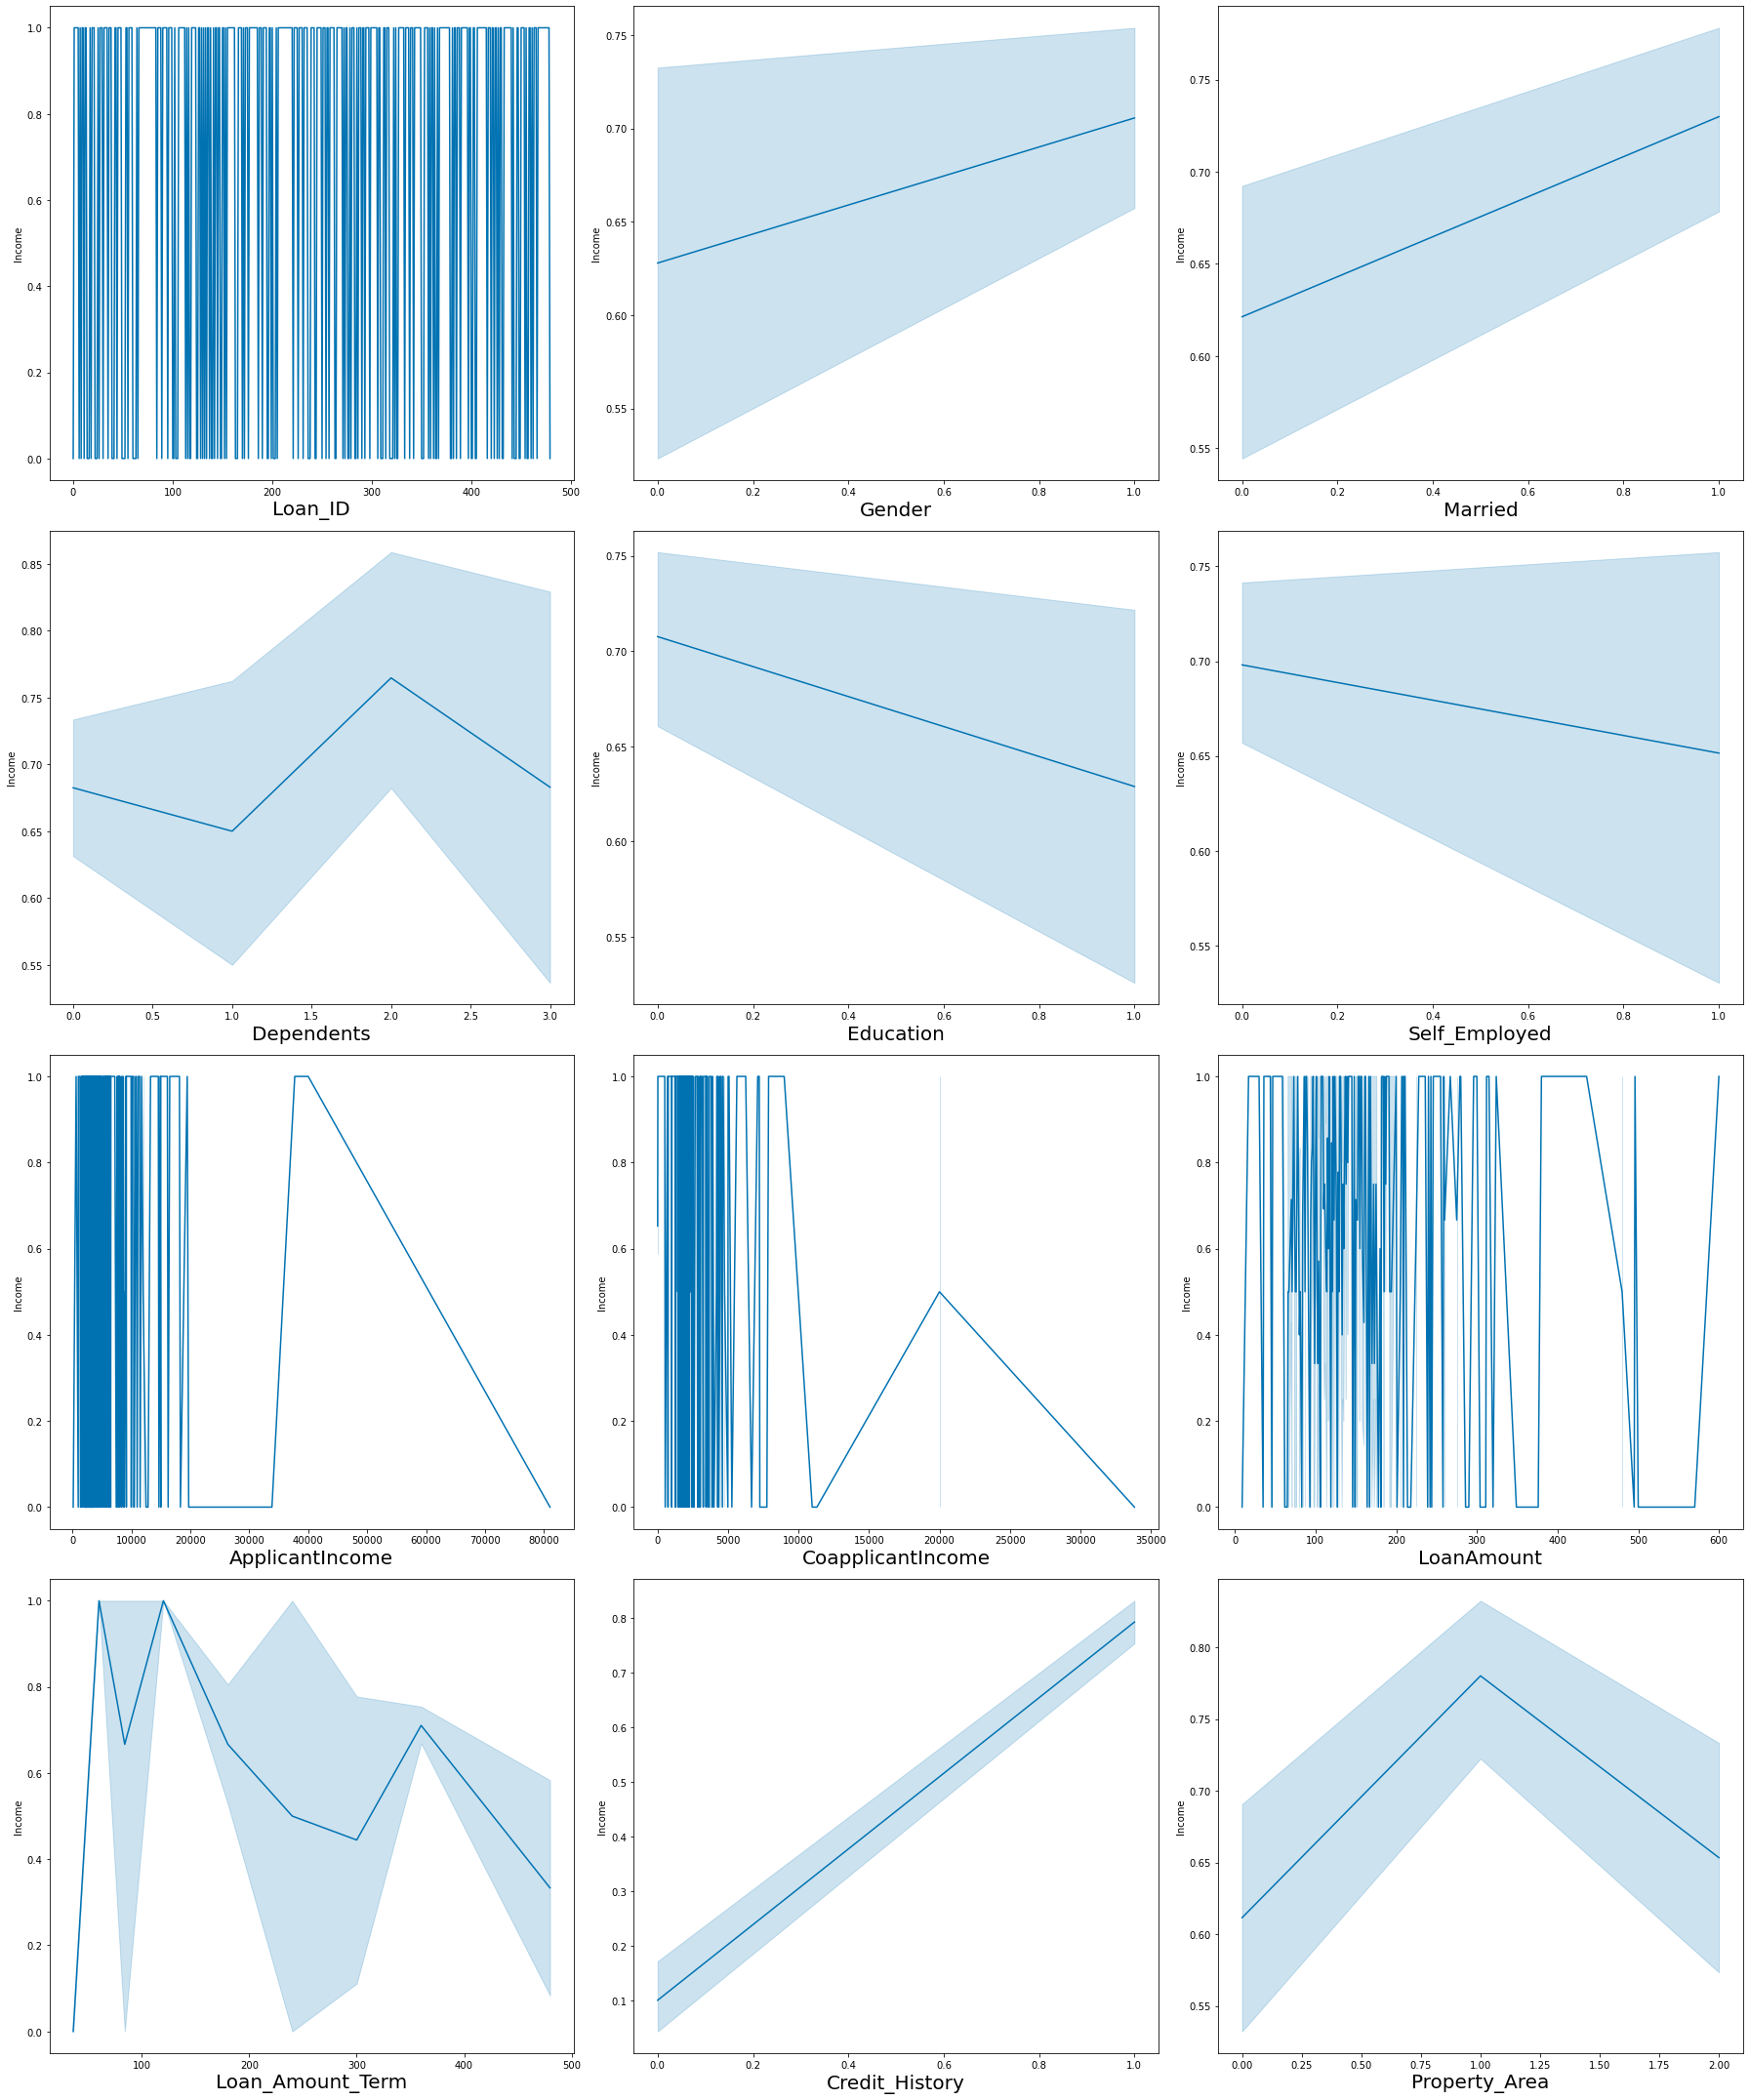

In [85]:
#Lets see how the data is distributed for every column as a whole

#Visualizing Relationship

plt.figure(figsize =(25,30), facecolor = 'white')
plotnumber = 1

for column in x:
    if plotnumber <=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.lineplot(x[column],y)
        plt.xlabel(column,fontsize = 20)
        plt.ylabel('Income',fontsize = 10)
    plotnumber +=1
plt.tight_layout()

We see that there is varied relationships with all the features and the label , We also did see the relationship in bar plot and piechart in previous section which gave us more insight in the relationship , these graphs are not showing the same , but we can see a different perspective here , seeing the pattern

# EDA

### Describing the Dataset

In [86]:
df.describe()

Loan_ID      Gender     Married  Dependents   Education  \
count  480.000000  480.000000  480.000000  480.000000  480.000000   
mean   239.500000    0.820833    0.647917    0.777083    0.202083   
std    138.708327    0.383892    0.478118    1.020815    0.401973   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%    119.750000    1.000000    0.000000    0.000000    0.000000   
50%    239.500000    1.000000    1.000000    0.000000    0.000000   
75%    359.250000    1.000000    1.000000    2.000000    0.000000   
max    479.000000    1.000000    1.000000    3.000000    1.000000   

       Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  \
count     480.000000       480.000000         480.000000  480.000000   
mean        0.137500      5364.231250        1581.093583  144.735417   
std         0.344734      5668.251251        2617.692267   80.508164   
min         0.000000       150.000000           0.000000    9.000000   
25%         0.000000      2898.750000           0.000000  100.000000   
50%         0.000000      3859.000000        1084.500000  128.000000   
75%         0.000000      5852.500000        2253.250000  170.000000   
max         1.000000     81000.000000       33837.000000  600.000000   

       Loan_Amount_Term  Credit_History  Property_Area  Loan_Status  
count        480.000000      480.000000     480.000000   480.000000  
mean         342.050000        0.854167       1.022917     0.691667  
std           65.212401        0.353307       0.776411     0.462287  
min           36.000000        0.000000       0.000000     0.000000  
25%          360.000000        1.000000       0.000000     0.000000  
50%          360.000000        1.000000       1.000000     1.000000  
75%          360.000000        1.000000       2.000000     1.000000  
max          480.000000        1.000000       2.000000     1.000000

#### Observations:-

- As we have mentioned in the previous notes with the df. describe , we see that there are outliers and extreme values in ApplicantImcome and Coapplicant income need to be treated 

### Visualization of the Data Properties


<AxesSubplot:>

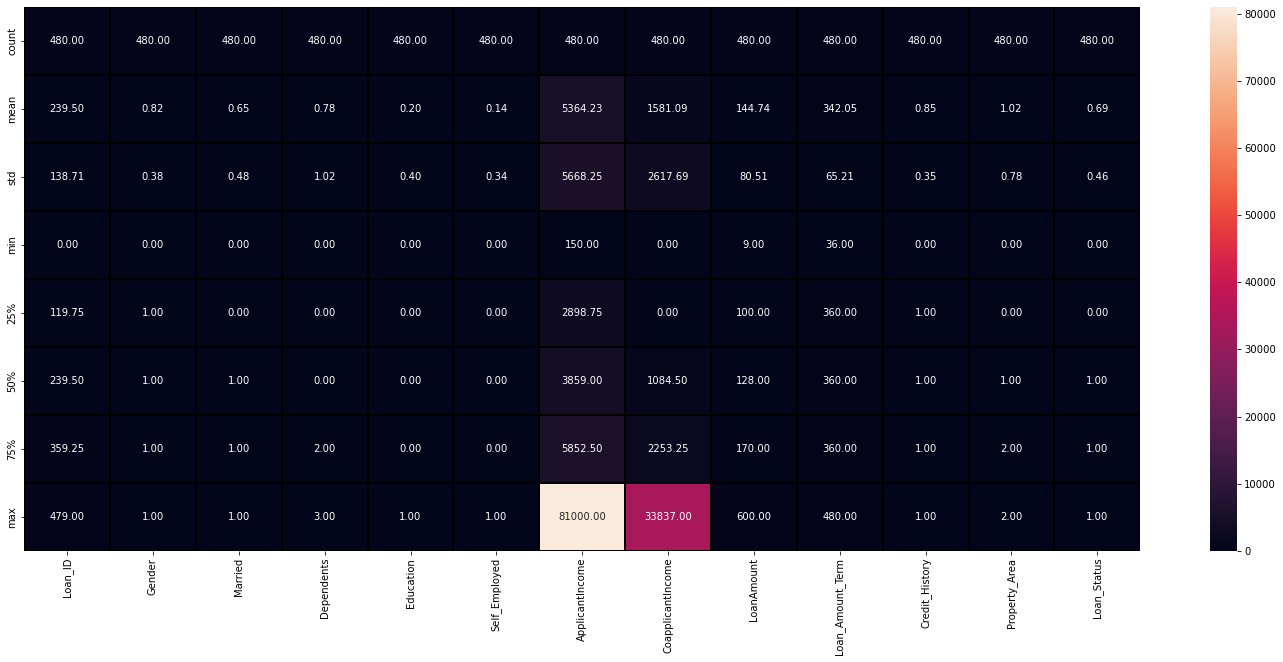

In [87]:
#Lets see how the data is distributed for every column

plt.figure(figsize=(25,10))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="black",fmt='0.2f')

We see that the same here we see Applicant incomeas well as Coapplicant income needs to be treated and Total loan amout also has a couple of outliers to be treated, So we can assume the data has some extreme values need to scale the data after removing skewness


In [88]:
df.skew()

Loan_ID              0.000000
Gender              -1.678471
Married             -0.621334
Dependents           0.942272
Education            1.488474
Self_Employed        2.111872
ApplicantIncome      6.917027
CoapplicantIncome    5.881622
LoanAmount           2.361437
Loan_Amount_Term    -2.333710
Credit_History      -2.013253
Property_Area       -0.039673
Loan_Status         -0.832681
dtype: float64

The categorical columns have only more than 0.55 skew so we cannot treat them and we need them as they provide valuable info for the data so we are only treating the continuous columns data 

In [89]:
#making the skew less than or equal to 0.55 for better prediction and plotting Normal distribution

skew=('ApplicantIncome', 'CoapplicantIncome', 'LoanAmount')

for col in skew:
    if df.skew().loc[col]> 0.55:
        df[col] = np.log1p(df[col])

In [90]:
df.skew()

Loan_ID              0.000000
Gender              -1.678471
Married             -0.621334
Dependents           0.942272
Education            1.488474
Self_Employed        2.111872
ApplicantIncome      0.565144
CoapplicantIncome   -0.150104
LoanAmount          -0.375544
Loan_Amount_Term    -2.333710
Credit_History      -2.013253
Property_Area       -0.039673
Loan_Status         -0.832681
dtype: float64

When we first calculate the skew value and some of the column skew value are far from zero almost 13 so its diificult to make a good model with this.

- The best skew value for normally distributes is very close to zero, so we are using “log1p” method to make the skew value near to zero
- In the last cell I am again checking the skewness value and there is difference between the first skewness value and second, now the skewness value of each column is near to zero.

- Making the skewness value near to zero will help to get better score.

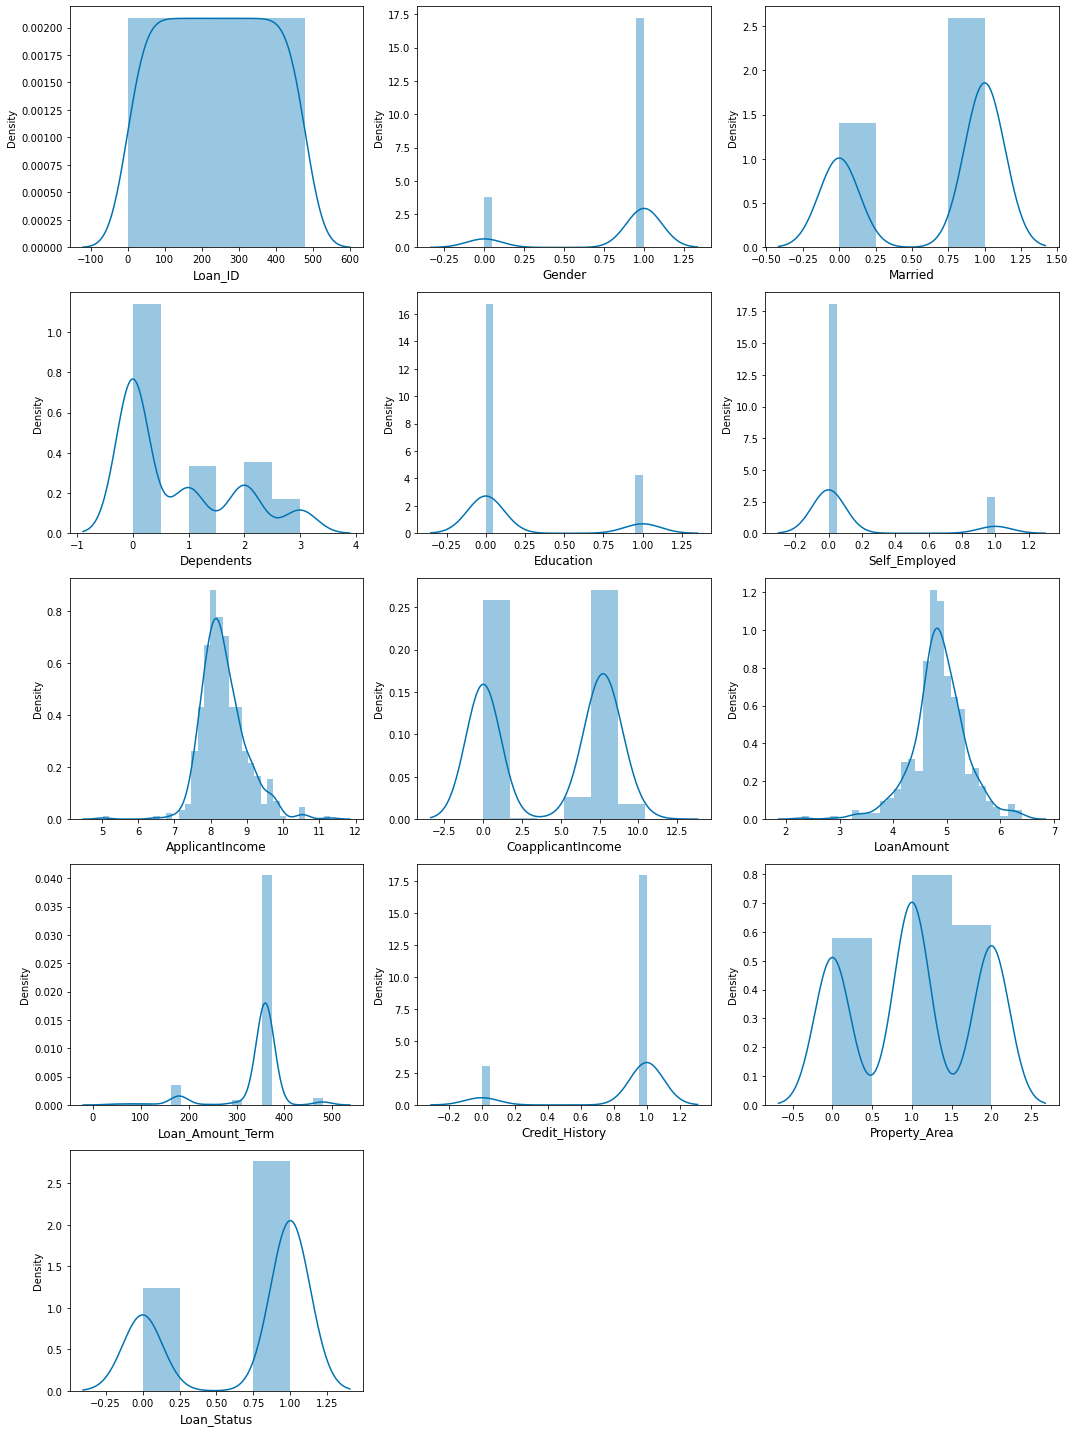

In [91]:
#Lets see how the data is distributed for every column after the treatment

plt.figure(figsize =(15,20), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=13:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 12)
        
    plotnumber +=1
plt.tight_layout()

### Correlation of the columns with the  target variable -Income

In [92]:
df.corr()['Loan_Status'].sort_values()

Education           -0.068437
LoanAmount          -0.056937
Self_Employed       -0.034715
Loan_Amount_Term    -0.007798
ApplicantIncome     -0.003335
Property_Area        0.031361
Dependents           0.035428
Loan_ID              0.040306
CoapplicantIncome    0.061193
Gender               0.064504
Married              0.112321
Credit_History       0.529390
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

We see that Credit_History has the highest correlation with the target variable having a score of 0.52 which is the highest and Mariied is the 2nd Highest with Coapplicant Income 

Overall the rest of the columns show very less correaltion or negative correlation with the target . Same with the highest and the 2nd one as we dont have any feature giving above 52% impact



### Heatmap of Correlation of the columns within the Columns or Features and Target

<AxesSubplot:>

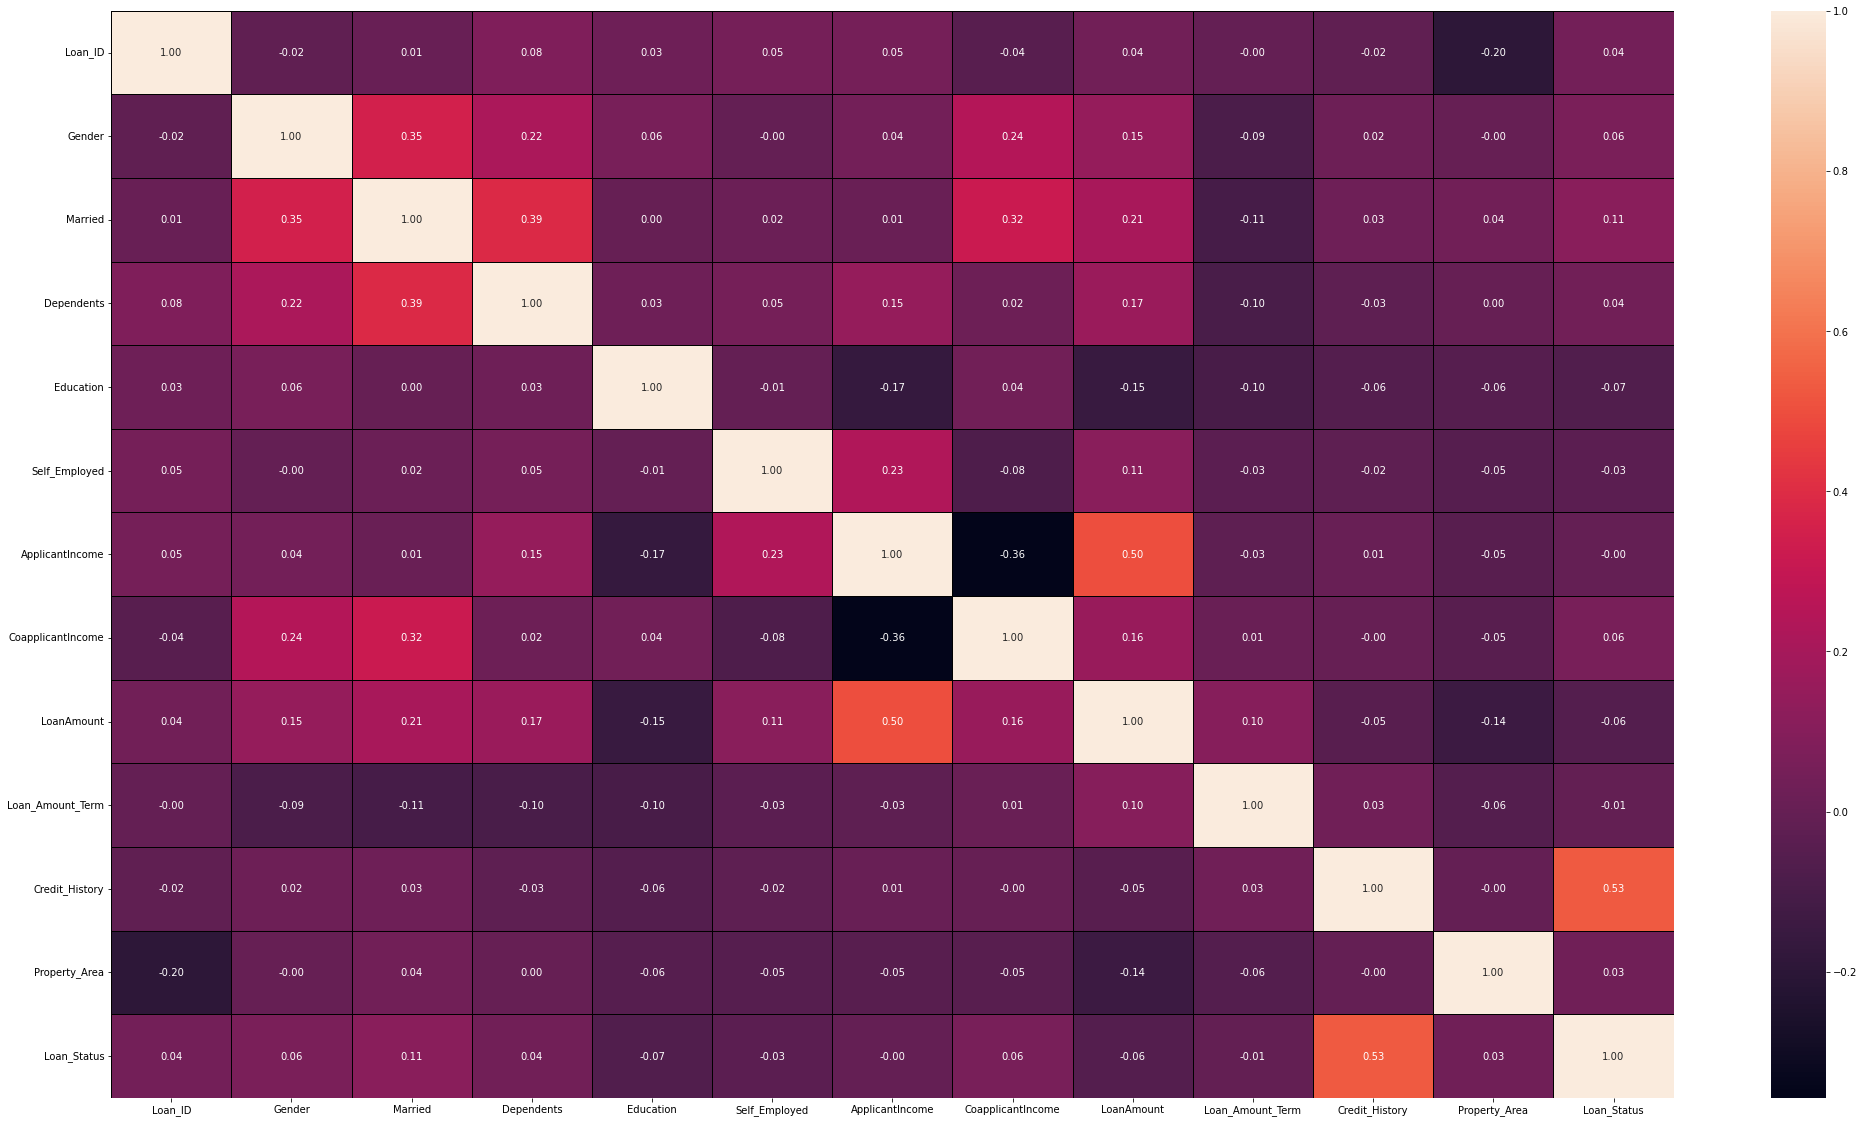

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
#size of canvas
plt.figure(figsize=(35,20))
sns.heatmap(df.corr(),annot=True, linewidths=0.5,linecolor='black', fmt='.2f')

### Observations of  heatmap

- we see that there isnt multicollinearity problem in the data, some correlation between ApplicantIncoime and LoanAmount is seen , but apart from that the rest of the features are not having  high correaltion and we need not omit any features for the prediction

These are not having very high correlation and we want to use the data to see if it gives some much needed data to the model we are building

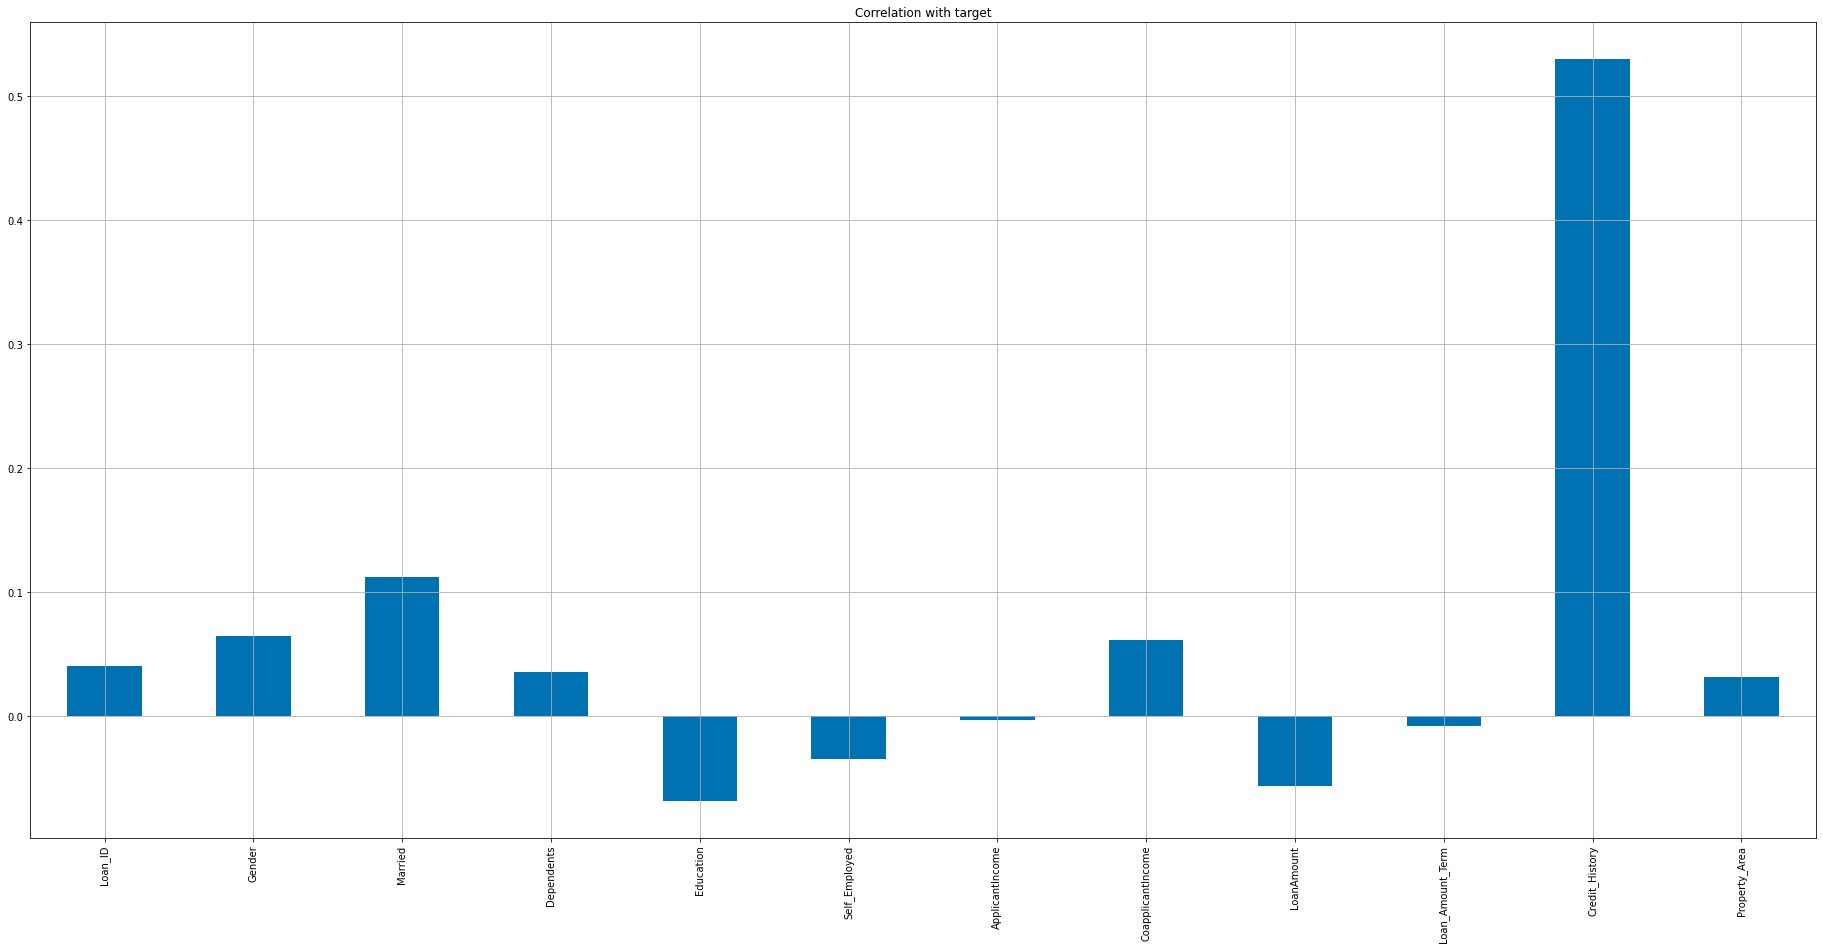

In [94]:
# Plotting a barplot to see th relationship with 1st label in a better way

df.drop('Loan_Status', axis=1).corrwith(df.Loan_Status).plot(kind='bar', grid=True,figsize=(32,15),
                                                  title='Correlation with target')

plt.show()

In bar graph we see a better view of the earlier df.corr fuction graphically represented

In [95]:
# Dropping the Loan ID columns as its only an index
df.drop(columns=['Loan_ID'],inplace=True)

In [96]:
df

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1           1          0              0         8.430327   
2         1        1           0          0              1         8.006701   
3         1        1           0          1              0         7.857094   
4         1        0           0          0              0         8.699681   
5         1        1           2          0              1         8.597482   
..      ...      ...         ...        ...            ...              ...   
609       0        0           0          0              0         7.972811   
610       1        1           3          0              0         8.320448   
611       1        1           1          0              0         8.996280   
612       1        1           2          0              0         8.933796   
613       0        0           0          0              1         8.430327   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1             7.319202    4.859812             360.0             1.0   
2             0.000000    4.204693             360.0             1.0   
3             7.765993    4.795791             360.0             1.0   
4             0.000000    4.955827             360.0             1.0   
5             8.342125    5.590987             360.0             1.0   
..                 ...         ...               ...             ...   
609           0.000000    4.276666             360.0             1.0   
610           0.000000    3.713572             180.0             1.0   
611           5.484797    5.537334             360.0             1.0   
612           0.000000    5.236442             360.0             1.0   
613           0.000000    4.897840             360.0             0.0   

     Property_Area  Loan_Status  
1                0            0  
2                2            1  
3                2            1  
4                2            1  
5                2            1  
..             ...          ...  
609              0            1  
610              0            1  
611              2            1  
612              2            1  
613              1            0  

[480 rows x 12 columns]

In [97]:
df.head()

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
1       1        1           1          0              0         8.430327   
2       1        1           0          0              1         8.006701   
3       1        1           0          1              0         7.857094   
4       1        0           0          0              0         8.699681   
5       1        1           2          0              1         8.597482   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1           7.319202    4.859812             360.0             1.0   
2           0.000000    4.204693             360.0             1.0   
3           7.765993    4.795791             360.0             1.0   
4           0.000000    4.955827             360.0             1.0   
5           8.342125    5.590987             360.0             1.0   

   Property_Area  Loan_Status  
1              0            0  
2              2            1  
3              2            1  
4              2            1  
5              2            1

We see that all the numerical columns such as Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week have outliers , so we will use zscore to treat them and then scale the data

### Using SelectKBest Feature Selection Method - Target - Income

Select KBest use f_classif function to find the best features, where f_classif uses Anova Test

In [98]:
# Divide data into features and label

X = df.drop(columns = ['Loan_Status'])
y = df['Loan_Status']

In [99]:
from sklearn.feature_selection import SelectKBest, f_classif

In [100]:
best_features = SelectKBest(score_func = f_classif, k=11)

fit = best_features.fit(X,y)

df_scores = pd.DataFrame(fit.scores_)

df_columns = pd.DataFrame(X.columns)


#concatenate dataframes

feature_scores = pd.concat([df_columns, df_scores], axis = 1)

feature_scores.columns = ['Feature_name', 'Score']   #name output columns

print(feature_scores.nlargest(11,'Score'))  #Print Best 4 features

         Feature_name       Score
9      Credit_History  186.122727
1             Married    6.107491
3           Education    2.249320
0              Gender    1.997174
6   CoapplicantIncome    1.796630
7          LoanAmount    1.554619
2          Dependents    0.600717
4       Self_Employed    0.576742
10      Property_Area    0.470570
8    Loan_Amount_Term    0.029065
5     ApplicantIncome    0.005317


### We see that the feature Credit History is the best  as the score they have are greater than 186 approx which is really high, the rest of them do not have much impact or influence on the status, but we are only performing this step as a way to analyze the data even further , but we will not remove any columns as the data shows that most of the column is good for prediction 

### Variance Inflation Factor

Checking for Multicollinearity problem to see if one feature is dependent on the other , we need to scale the data first using MINMAX Scalar

In [101]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

In [102]:
X_scaled = mms.fit_transform(X)

In [103]:
X_scaled.shape

(480, 11)

In [104]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#chck Values
vif

vif           Features
0    6.606188             Gender
1    4.074988            Married
2    1.947453         Dependents
3    1.245759          Education
4    1.226672      Self_Employed
5   43.568457    ApplicantIncome
6    3.253506  CoapplicantIncome
7   44.831171         LoanAmount
8   17.347488   Loan_Amount_Term
9    6.477780     Credit_History
10   2.655538      Property_Area

We see the same columns whichwe have seen the outliers have now shown that they have a very high VIF score which we need to treat before we can go into model building 

### Principal Component Analysis (PCA)

It is a dimension reduction technique and not a feature selection one, and we are going to apply on the features only , it is mainly used if there are too many features and no correlation with the target but its the final analysis we are going to do to chcek for multicollinearity problem

In [105]:
from sklearn.decomposition import PCA

In [106]:
pca = PCA()

In [107]:
#To scale the data with PCA so we can plot the graph to see whats the coverage 

pca.fit_transform(X_scaled) 

array([[-0.45619849,  0.04486538, -0.56256868, ..., -0.00673935,
        -0.04155207, -0.04921523],
       [-0.12303204, -0.47608205,  0.23085095, ..., -0.00798207,
        -0.23469749,  0.03270379],
       [-0.42625586,  0.45370767,  0.72734269, ..., -0.09589657,
         0.02262399,  0.01323323],
       ...,
       [-0.42088406, -0.44435096,  0.29483951, ..., -0.10931054,
         0.1736157 , -0.01124692],
       [-0.3433811 , -0.52233186,  0.38276731, ..., -0.1022414 ,
         0.07309743,  0.01658352],
       [ 1.09454457, -0.06471948, -0.07668126, ..., -0.01693138,
        -0.0304148 ,  0.04603045]])

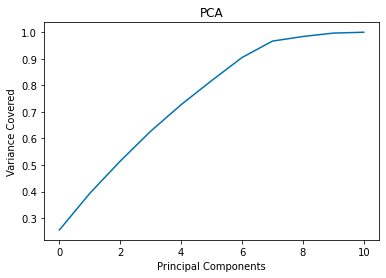

In [108]:
# lets plot scree plot to check the best components

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel("Variance Covered")
plt.title('PCA')
plt.show()

#### We see that in order to cover 95% - 100% of the data we need to have only have 7 features and we can remove the rest , We will use the Kbest to decide which features are the best and see if we should remove any feautes , But at this point we will move ahead as all the columns constitute to making the model better "


### Using Zscore to deal with the outliers in the data

In [109]:
df.shape

(480, 12)

In [122]:
from scipy.stats import zscore

z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 12,  12,  54,  75,  75,  98,  98, 120, 120, 142, 144, 170, 187,
        205, 319, 347, 386, 390, 426, 433, 438, 444, 450, 457], dtype=int64),
 array([7, 8, 8, 7, 8, 7, 8, 5, 7, 5, 5, 5, 8, 8, 5, 5, 8, 5, 8, 7, 7, 7,
        8, 8], dtype=int64))

In [123]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1           1          0              0         8.430327   
2         1        1           0          0              1         8.006701   
3         1        1           0          1              0         7.857094   
4         1        0           0          0              0         8.699681   
5         1        1           2          0              1         8.597482   
..      ...      ...         ...        ...            ...              ...   
609       0        0           0          0              0         7.972811   
610       1        1           3          0              0         8.320448   
611       1        1           1          0              0         8.996280   
612       1        1           2          0              0         8.933796   
613       0        0           0          0              1         8.430327   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1             7.319202    4.859812             360.0             1.0   
2             0.000000    4.204693             360.0             1.0   
3             7.765993    4.795791             360.0             1.0   
4             0.000000    4.955827             360.0             1.0   
5             8.342125    5.590987             360.0             1.0   
..                 ...         ...               ...             ...   
609           0.000000    4.276666             360.0             1.0   
610           0.000000    3.713572             180.0             1.0   
611           5.484797    5.537334             360.0             1.0   
612           0.000000    5.236442             360.0             1.0   
613           0.000000    4.897840             360.0             0.0   

     Property_Area  Loan_Status  
1                0            0  
2                2            1  
3                2            1  
4                2            1  
5                2            1  
..             ...          ...  
609              0            1  
610              0            1  
611              2            1  
612              2            1  
613              1            0  

[460 rows x 12 columns]

In [125]:
df_new_z.shape

(460, 12)

In [126]:
#Percentage of Data loss

Data_loss = ((480-460)/480)*100

In [127]:
Data_loss

4.166666666666666

We have lost 4.17% of the data as we have to remove the skewness which occured due to outliers so that the model is not biased towards it

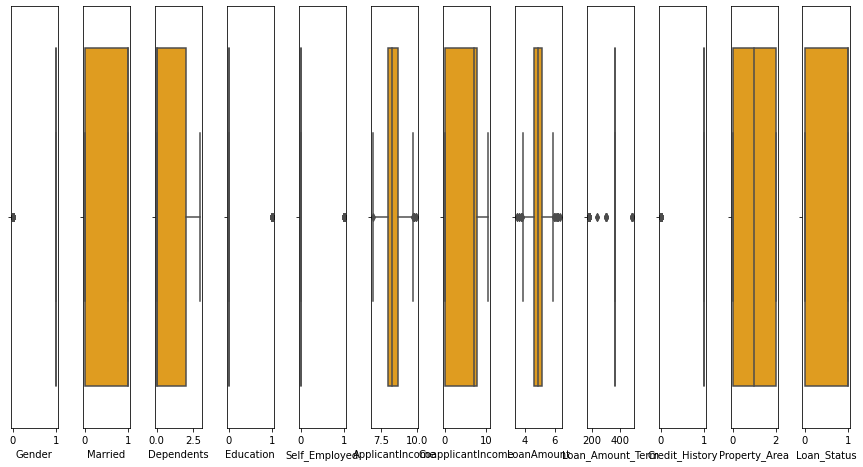

In [128]:
collist=df_new_z.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df_new_z[collist[i]],color='orange',orient='h')
    plt.tight_layout()

<AxesSubplot:>

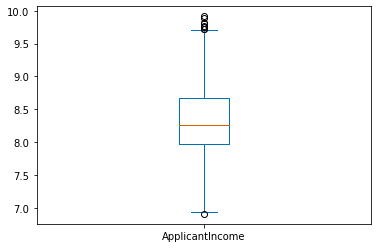

In [129]:
df_new_z['ApplicantIncome'].plot.box()

After  treating with Zscore we see much better data , the only columns we see there is some outliers are the categorical columns which we cannot do anything for as we need all the data and we only treat continuos data for outliers

### Creating the Model for  Label-Loan_Status - Choosing the Best Model

### Over Sampling using SMOTE

In [130]:
y.value_counts()

1    332
0    148
Name: Loan_Status, dtype: int64

As we see the dataset is imbalanced and we need to treat this or the model will give a good score but will be biased

In [131]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.75,random_state = 322)

In [132]:
from collections import Counter
Counter(y_train)

Counter({1: 257, 0: 103})

In [133]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

In [134]:
sm = SMOTE()

ove_smp = SMOTE()

X_train_ns,y_train_ns= ove_smp.fit_resample(X_train,y_train) # using resample as the sample did not work

print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({1: 257, 0: 103})
The number of classes after fit Counter({1: 257, 0: 257})


Here we see that the classes have become balanced and our model is ready to be trained

In [135]:
from sklearn.preprocessing import StandardScaler # scale the data as we have very high values in fnlwgt

scaler = StandardScaler()
X_train_ns = pd.DataFrame(scaler.fit_transform(X_train_ns), columns = X_train.columns)
X_test= pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_train_ns

Gender   Married  Dependents  Education  Self_Employed  \
0    0.518783 -1.247884   -0.710493  -0.473085       2.918650   
1    0.518783  0.801357   -0.710493  -0.473085      -0.342624   
2    0.518783 -1.247884   -0.710493  -0.473085       2.918650   
3   -1.927588 -1.247884   -0.710493  -0.473085      -0.342624   
4    0.518783 -1.247884   -0.710493  -0.473085      -0.342624   
..        ...       ...         ...        ...            ...   
509  0.518783 -1.247884   -0.710493  -0.473085      -0.342624   
510  0.518783 -1.247884   -0.710493  -0.473085       2.918650   
511 -1.927588 -1.247884   -0.710493  -0.473085      -0.342624   
512  0.518783 -1.247884   -0.710493  -0.473085      -0.342624   
513  0.518783  0.801357    0.298328  -0.473085      -0.342624   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           0.904480          -1.079773    0.202087          0.288326   
1           0.591211           1.074453    0.626685          0.288326   
2           0.970110          -1.079773   -0.812991          0.288326   
3          -0.837011          -1.079773   -1.254376          0.288326   
4           0.471732          -1.079773    0.131182          0.288326   
..               ...                ...         ...               ...   
509        -1.192786          -1.079773   -1.538762          0.288326   
510        -0.667589           1.029445    0.470085         -2.340601   
511        -0.731596          -1.079773   -1.651174          0.288326   
512        -0.895851           1.398635   -0.552333          0.288326   
513        -0.716532           0.787203   -0.217923         -2.329802   

     Credit_History  Property_Area  
0          0.547606      -1.201832  
1          0.547606       0.043615  
2          0.547606       0.043615  
3          0.547606       1.289062  
4          0.547606       1.289062  
..              ...            ...  
509        0.547606       1.289062  
510       -1.866844      -1.201832  
511        0.547606      -1.201832  
512        0.547606       1.289062  
513       -2.003911      -1.201832  

[514 rows x 11 columns]

We have successfully balanced the data as well as scaled the data to start creating the model now

# Logistic Regression

In [137]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
from sklearn.model_selection import train_test_split


In [138]:
scores=[]
for i in range(0,100):
    X_train_ns,X_test,y_train_ns,y_test = train_test_split(X,y,test_size = 0.25,random_state = i)
    
    lr.fit(X_train_ns,y_train_ns)
    
    pred_train = lr.predict(X_train_ns)
    pred_test=lr.predict(X_test)
    
    print(f"At random state {i},the training accuracy is :-{accuracy_score(y_train_ns,pred_train)}")
    print(f"At random state {i},the Testing accuracy is :-{accuracy_score(y_test,pred_test)}")
    print('\n')
    scores.append(accuracy_score(y_test,pred_test))

At random state 0,the training accuracy is :-0.8166666666666667
At random state 0,the Testing accuracy is :-0.7833333333333333


At random state 1,the training accuracy is :-0.8277777777777777
At random state 1,the Testing accuracy is :-0.75


At random state 2,the training accuracy is :-0.8138888888888889
At random state 2,the Testing accuracy is :-0.7916666666666666


At random state 3,the training accuracy is :-0.8166666666666667
At random state 3,the Testing accuracy is :-0.7833333333333333


At random state 4,the training accuracy is :-0.8222222222222222
At random state 4,the Testing accuracy is :-0.7666666666666667


At random state 5,the training accuracy is :-0.8083333333333333
At random state 5,the Testing accuracy is :-0.8083333333333333


At random state 6,the training accuracy is :-0.8055555555555556
At random state 6,the Testing accuracy is :-0.8166666666666667


At random state 7,the training accuracy is :-0.8194444444444444
At random state 7,the Testing accuracy is :-0.7

Finding the highest score using Argmax

In [139]:
np.argmax(scores)

41

In [140]:
scores[np.argmax(scores)]

0.8833333333333333

### We see that this model work well with the data , we see that the scores are the same at Training and testing state
    
    - we are getting 
     
     At random state 5,the training accuracy is :-0.8083333333333333
     
     At random state 5,the Testing accuracy is :-0.8083333333333333
     
- the training score and Testing score are equal  to each other here
- both the train and test score are really good but we will test more an also th cv score to see if its consistent  


### Train & Test the data

In [141]:
X_train_ns,X_test,y_train_ns,y_test = train_test_split(X,y,test_size = 0.25,random_state = 17 ) 

# as the best random state we have chosen is 5

### We are creating a method called Metric to allow us to show the metrics of each classification model we use , so we dont have to code it again 

In [142]:
#Write one function and call as many times to check accuracy_score of different models

def metric_score(clf,X_train_ns,X_test,y_train_ns,y_test,train=True):
    if train:
        y_pred = clf.predict(X_train_ns)
    
        
        print("\n===============================Train Result=============================")
        
        print(f"Accuracy score : {accuracy_score(y_train_ns,y_pred) * 100: .2f}%")
        
    elif train == False:
        pred = clf.predict(X_test)
        
        print("\n===============================Test Result===============================")
        print(f"Accuracy Scorre : {accuracy_score(y_test,pred) * 100: .2f}%")
        
        
        print ('\n \n Test Classification Report \n', classification_report(y_test, pred, digits = 2)) ##Model Confidence /Accurancy
        

In [143]:
#Call the function and pass dataset to check the train score and the test score

metric_score(lr,X_train_ns,X_test,y_train_ns,y_test,train=True) #This is for the Training Score

metric_score(lr,X_train_ns,X_test,y_train_ns,y_test,train=False) #This is for the Testing Score


===============================Train Result=============================
Accuracy score :  80.83%

===============================Test Result===============================
Accuracy Scorre :  80.00%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.39      0.56        38
           1       0.78      0.99      0.87        82

    accuracy                           0.80       120
   macro avg       0.86      0.69      0.71       120
weighted avg       0.83      0.80      0.77       120



### We see that this model is having a pretty good score in Logistic regression , we see the train score as 80.83% and the test score as 80.00% which is pretty good considering that this is actually a UPSIZED dataset and we have also done balancing of the label category due to imbalance 

Important to note we have used a different random state as the one we chose was having a higher train score as compared to this one so we changed

In [144]:
print(confusion_matrix(y_test,pred_test))  

[[ 2 36]
 [16 66]]


We see that the type 1 and 2 error is pretty high , and we need to see other models , but before that we will check cv score

### Cross-Validation of the model

In [145]:
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,X,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold{j} the cv score is {cv_mean} and accuracy score for training is {accuracy_score(y_train_ns,pred_train)}and the accuracy for testing is {accuracy_score(y_test,pred_test)}")
    print('\n')

At cross fold2 the cv score is 0.8020833333333333 and accuracy score for training is 0.6472222222222223and the accuracy for testing is 0.5666666666666667


At cross fold3 the cv score is 0.7999999999999999 and accuracy score for training is 0.6472222222222223and the accuracy for testing is 0.5666666666666667


At cross fold4 the cv score is 0.8020833333333333 and accuracy score for training is 0.6472222222222223and the accuracy for testing is 0.5666666666666667


At cross fold5 the cv score is 0.8020833333333334 and accuracy score for training is 0.6472222222222223and the accuracy for testing is 0.5666666666666667


At cross fold6 the cv score is 0.8083333333333332 and accuracy score for training is 0.6472222222222223and the accuracy for testing is 0.5666666666666667


At cross fold7 the cv score is 0.8063877725003044 and accuracy score for training is 0.6472222222222223and the accuracy for testing is 0.5666666666666667


At cross fold8 the cv score is 0.80625 and accuracy score for tr

We see that the model is overfitting the data as we see the cv score of 81% approx is giving a test score of 57% approx so we need to check other models as this model is not working well and we have a underfitted test score

### Decision Tree Classifier

In [146]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()

X_train_ns,X_test,y_train_ns,y_test = train_test_split(X,y,test_size = 0.25,random_state = 17) #as we have seen a good score on 98th state
dt.fit(X_train_ns,y_train_ns)
pred_train = dt.predict(X_train_ns)
pred_test = dt.predict(X_test)
print(f"At random state {17},the training accuracy is :-{accuracy_score(y_train_ns,pred_train)}")
print(f"At random state {17},the Testing accuracy is :-{accuracy_score(y_test,pred_test)}")
print('\n')


At random state 17,the training accuracy is :-1.0
At random state 17,the Testing accuracy is :-0.7




In [147]:
#Call the function and pass dataset to check the train score and the test score

metric_score(dt,X_train_ns,X_test,y_train_ns,y_test,train=True) #This is for the Training Score

metric_score(dt,X_train_ns,X_test,y_train_ns,y_test,train=False) #This is for the Testing Score


===============================Train Result=============================
Accuracy score :  100.00%

===============================Test Result===============================
Accuracy Scorre :  70.00%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.53      0.55      0.54        38
           1       0.79      0.77      0.78        82

    accuracy                           0.70       120
   macro avg       0.66      0.66      0.66       120
weighted avg       0.70      0.70      0.70       120



In [148]:
print(confusion_matrix(y_test,pred_test)) 

[[21 17]
 [19 63]]


### Observations of Decision Tree Classifier :-

    - We see that the training score is boosted all the way to 100% which is the highest  but the testing score is fallen shorter than logistic regression  @ 70.00 % which is lesser than the logistic model   , also we see that the F1 score is the same as test score for accuracy and precision is 54% for 0 and only 78% for 1 which is same than the last model 
    
    - the model is not performing as good as Logistic regression but we cant use this model moving to check the cv score

In [149]:
#Cross validation of the model
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(dt,X,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold{j} the cv score is {cv_mean} and accuracy score for training is {accuracy_score(y_train_ns,pred_train)}and the accuracy for testing is {accuracy_score(y_test,pred_test)}")
    print('\n')

At cross fold2 the cv score is 0.7104166666666667 and accuracy score for training is 1.0and the accuracy for testing is 0.7


At cross fold3 the cv score is 0.7125 and accuracy score for training is 1.0and the accuracy for testing is 0.7


At cross fold4 the cv score is 0.7291666666666667 and accuracy score for training is 1.0and the accuracy for testing is 0.7


At cross fold5 the cv score is 0.7229166666666667 and accuracy score for training is 1.0and the accuracy for testing is 0.7


At cross fold6 the cv score is 0.7208333333333333 and accuracy score for training is 1.0and the accuracy for testing is 0.7


At cross fold7 the cv score is 0.7438192668371696 and accuracy score for training is 1.0and the accuracy for testing is 0.7


At cross fold8 the cv score is 0.7104166666666667 and accuracy score for training is 1.0and the accuracy for testing is 0.7


At cross fold9 the cv score is 0.7147682273468436 and accuracy score for training is 1.0and the accuracy for testing is 0.7




We see really good cv score at state 4 where the cv score is 0.7291666666666667  and accuracy score for training is 1.0and the accuracy for testing is 0.7 so the closest state where test and cv score is present and this score is much better than the logistic regression score we got earlier

### KNN Classifier

In [150]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()

knn.fit(X_train_ns,y_train_ns)
knn.score(X_train_ns,y_train_ns)
pred_decision =knn.predict(X_test)

knns = accuracy_score(y_test,pred_decision)
print('Accuracy Score :',knns*100)

knnscore = cross_val_score(knn,X,y,cv=3)
knnc =knnscore.mean()
print('Cross Val Score :',knnc*100)

print(confusion_matrix(y_test,pred_decision)) 

Accuracy Score : 70.83333333333334
Cross Val Score : 71.66666666666667
[[ 9 29]
 [ 6 76]]


In [151]:
#Call the function and pass dataset to check the train score and the test score

metric_score(knn,X_train_ns,X_test,y_train_ns,y_test,train=True) #This is for the Training Score

metric_score(knn,X_train_ns,X_test,y_train_ns,y_test,train=False) #This is for the Testing Score


===============================Train Result=============================
Accuracy score :  81.39%

===============================Test Result===============================
Accuracy Scorre :  70.83%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.60      0.24      0.34        38
           1       0.72      0.93      0.81        82

    accuracy                           0.71       120
   macro avg       0.66      0.58      0.58       120
weighted avg       0.68      0.71      0.66       120



### Observations of KNN Classifier :-
    - We see that the training score is lesser than Decision tree @ 70.83%   
    
    we see that the F1 score is the same  where accuracy for 0 is 34% and for 1 is 81% which is bad and model is biased 
    
    - the CV score is good though and very similar to the test accuracy @ 71% , so overall the model is ok , but we need to improve the f1 score and precision
    
    - we see the confusion matrix where the typ 1 and typ 2 error is horribly very high and we nned to test other models 

### Random Forest Classifier

In [152]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

rf.fit(X_train_ns,y_train_ns)
rf.score(X_train_ns,y_train_ns)
pred_decision =rf.predict(X_test)

rfs = accuracy_score(y_test,pred_decision)
print('Accuracy Score :',rfs*100)

rfscore = cross_val_score(rf,X,y,cv=8)
rfc =rfscore.mean()
print('Cross Val Score :',rfc*100)

print(confusion_matrix(y_test,pred_decision)) 

Accuracy Score : 81.66666666666667
Cross Val Score : 79.375
[[18 20]
 [ 2 80]]


In [153]:
#Call the function and pass dataset to check the train score and the test score

metric_score(rf,X_train_ns,X_test,y_train_ns,y_test,train=True) #This is for the Training Score

metric_score(rf,X_train_ns,X_test,y_train_ns,y_test,train=False) #This is for the Testing Score


===============================Train Result=============================
Accuracy score :  100.00%

===============================Test Result===============================
Accuracy Scorre :  81.67%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.47      0.62        38
           1       0.80      0.98      0.88        82

    accuracy                           0.82       120
   macro avg       0.85      0.72      0.75       120
weighted avg       0.83      0.82      0.80       120



### Observations of Random Forest Classifier :-

    - We see that like the decision tree the train score is at the max at 100% and we have test score much better at 81.67% , the F1 score is at 88% and precisiion @ 88% which is a good model and the best till now , we have imbalance dataset and we treated so we have a little higher Cv score of 79.37% approx so we are getting a good cv score as well which is on par with the test sore which is what we need the model to do 
    
    - the model has much lower errors in the confusion matrix as all the models 

### XgBoost

In [154]:
import xgboost as xgb

xgb = xgb.XGBClassifier()

xgb.fit(X_train_ns,y_train_ns)
xgb.score(X_train_ns,y_train_ns)
pred_decision =xgb.predict(X_test)

xgbs = accuracy_score(y_test,pred_decision)
print('Accuracy Score :',xgbs*100)

xgbscore = cross_val_score(xgb,X,y,cv=5)
xgbc =xgbscore.mean()
print('Cross Val Score :',xgbc*100)
print(confusion_matrix(y_test,pred_decision)) 

Accuracy Score : 79.16666666666666
Cross Val Score : 79.16666666666667
[[20 18]
 [ 7 75]]


In [155]:
#Call the function and pass dataset to check the train score and the test score

metric_score(xgb,X_train_ns,X_test,y_train_ns,y_test,train=True) #This is for the Training Score

metric_score(xgb,X_train_ns,X_test,y_train_ns,y_test,train=False) #This is for the Testing Score


===============================Train Result=============================
Accuracy score :  100.00%

===============================Test Result===============================
Accuracy Scorre :  79.17%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.74      0.53      0.62        38
           1       0.81      0.91      0.86        82

    accuracy                           0.79       120
   macro avg       0.77      0.72      0.74       120
weighted avg       0.79      0.79      0.78       120



### Observations of  XGboost Classifier :-

    - The training score is same as the random forest and the decision tree at 100% and we see a higher accuracy score for test at 79.17 % which is  lesser than the random forest ,we see the F1 score to be higher too @ 79% again higher to rf  the precision score is 77% which is more than the Random forest 
    
    The CV score is exact same as the accuracy score @ 79.16% which is lower than the random forest whcih had a closer cv to the test score @ 79.17% approx so overall really good scores from this model aand its the best till now considering the scores only
    
    Confusion matrix errors are higher compard to the random forest classifier 

### SVC

In [156]:
from sklearn.svm import SVC

svc= SVC()

svc.fit(X_train_ns,y_train_ns)
svc.score(X_train_ns,y_train_ns)
pred_decision =svc.predict(X_test)

svcs = accuracy_score(y_test,pred_decision)
print('Accuracy Score :',svcs*100)

svcscore = cross_val_score(svc,X,y,cv=9)
svcc =svcscore.mean()
print('Cross Val Score :',svcc*100)

print(confusion_matrix(y_test,pred_decision))

Accuracy Score : 68.33333333333333
Cross Val Score : 69.17074307011414
[[ 0 38]
 [ 0 82]]


In [157]:
#Call the function and pass dataset to check the train score and the test score

metric_score(svc,X_train_ns,X_test,y_train_ns,y_test,train=True) #This is for the Training Score

metric_score(svc,X_train_ns,X_test,y_train_ns,y_test,train=False) #This is for the Testing Score


===============================Train Result=============================
Accuracy score :  69.44%

===============================Test Result===============================
Accuracy Scorre :  68.33%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.68      1.00      0.81        82

    accuracy                           0.68       120
   macro avg       0.34      0.50      0.41       120
weighted avg       0.47      0.68      0.55       120



### Observations of SVC Classifier :-

    - We see that this model is  performimg worser than all the other models we tested where the train score is 69.44% and the test is 68.33% F1 score is less and precioson is 68% whic is less , the cv score is also on the lower side , 
    
    the confusion matrix is giving high error and we dont see any predictions for 0 classes in label , so this model is not at all doing well for the dataset

### We can assume that Random Forest Classifier is the best algorithm for this project as it has the highest scores and least difference between the Cross val score and accuracy but we need to check roc auc to finalize the decision

### Let's check ROC AUC Curve for the fitted Model

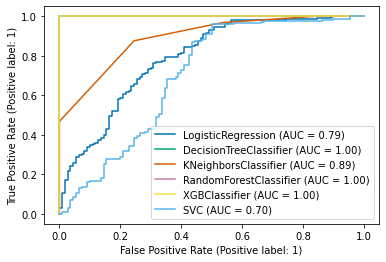

In [158]:
from sklearn.metrics import plot_roc_curve

### How well our model works on training Data

disp = plot_roc_curve(lr,X_train_ns,y_train_ns)

plot_roc_curve(dt,X_train_ns,y_train_ns, ax= disp.ax_) #ax_ = Axes with confusion matrix

plot_roc_curve(knn,X_train_ns,y_train_ns, ax= disp.ax_)

plot_roc_curve(rf,X_train_ns,y_train_ns, ax= disp.ax_)

plot_roc_curve(xgb,X_train_ns,y_train_ns, ax= disp.ax_)

plot_roc_curve(svc,X_train_ns,y_train_ns, ax= disp.ax_)

plt.legend(prop={'size' : 10}, loc='lower right' )

plt.show()

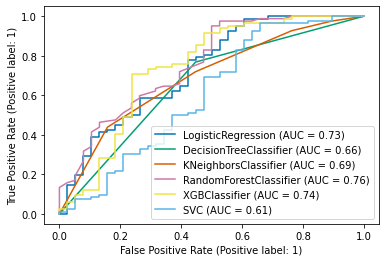

In [159]:
### How well our model works on Testing Data

disp = plot_roc_curve(lr,X_test,y_test)

plot_roc_curve(dt,X_test,y_test, ax= disp.ax_) #ax_ = Axes with confusion matrix

plot_roc_curve(knn,X_test,y_test, ax= disp.ax_)

plot_roc_curve(rf,X_test,y_test, ax= disp.ax_)

plot_roc_curve(xgb,X_test,y_test, ax= disp.ax_)

plot_roc_curve(svc,X_test,y_test, ax= disp.ax_)

plt.legend(prop={'size' : 10}, loc='lower right' )

plt.show()

### We have again proved that we will use the Random Forest Classifier as the best  model

- The Logistic Regression is only covering 79% of training data and only 73% of the test data, whereas Random forest classifier is covering 100% of training data as well as 76% of test data which is the highest . XGBoost may have 100% at train buts its only able to give 74% to test so we will go with Random forest  

- closest to  XGboost classifier model is random forest Classifier but the scores a a little better with Random forest 
- Random forest   will be an even better model with Hyperparameter tuning which will increase 

### Hyper parameter Tuning

In [160]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()

#Creating parameters to pass in RandomizedSearchCV

parameters = {'criterion':['gini','entropy'],
             'max_features':['auto','sqrt','log2'],
             'min_samples_split': [1, 2, 3, 4 ,5],
             'min_samples_leaf': [1, 3, 4, 5, 6,],
             'n_estimators' : [100,200,300,400,500]
             }

GCV = GridSearchCV(estimator = rf,param_grid=parameters, verbose=2, n_jobs = -1, scoring='accuracy')
GCV.fit(X_train_ns,y_train_ns) #fitting data into the model
GCV.best_params_ #printing the best parameters found by the GridSearch CV

Fitting 5 folds for each of 750 candidates, totalling 3750 fits


{'criterion': 'gini',
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 3,
 'n_estimators': 300}

In [161]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators = 500 ,min_samples_split=2,min_samples_leaf=6,max_features='auto',criterion='gini')

rf.fit(X_train_ns,y_train_ns)
rf.score(X_train_ns,y_train_ns)
pred_decision =rf.predict(X_test)

rfs = accuracy_score(y_test,pred_decision)
print('Accuracy Score :',rfs*100)

rfscore = cross_val_score(rf,X,y,cv=8)
rfc =rfscore.mean()
print('Cross Val Score :',rfc*100)
print(confusion_matrix(y_test,pred_test)) 

Accuracy Score : 80.0
Cross Val Score : 80.83333333333333
[[21 17]
 [19 63]]


We see that after tuning we are getting a lower score than we got before  , but we also see that the Cv score is come much closer to the  accuracy score @ 80.0% which is great as the closer the score the better the model. let save the rf model in pickle file  

In [162]:
GCV_pred=GCV.best_estimator_.predict(X_test) #predicting with the best parameters
accuracy_score(y_test,GCV_pred) #Checking Final Accuracy

0.8

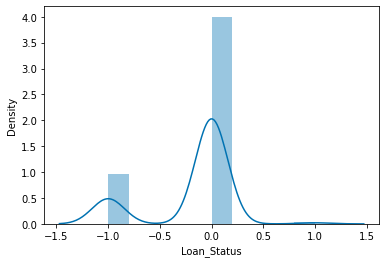

In [163]:
#Plotting distplot to show equillibrium 

sns.distplot(y_test-pred_decision)
plt.show()

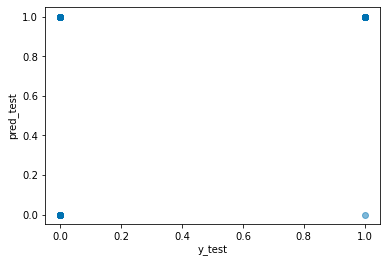

In [164]:
plt.scatter(y_test, pred_decision, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("pred_test")
plt.show()

We see that the model is accurate as the points in 0 are shown in 0 and 1 in 1 and the graph shows noraml distribution as well 

In [165]:
import pickle
filename = 'Loan.pkl'
pickle.dump(rf,open(filename,'wb'))

### Conclusion

In [166]:
loaded_model = pickle.load(open('loan.pkl','rb'))
result = loaded_model.score(X_test,y_test)
print(result*100)

80.0


In [167]:
conclusion = pd.DataFrame([loaded_model.predict(X_test)[:],pred_decision[:]],index=['Predicted','Orignal'])

In [168]:
conclusion

0    1    2    3    4    5    6    7    8    9    ...  110  111  \
Predicted    1    1    1    1    1    1    1    1    1    1  ...    1    1   
Orignal      1    1    1    1    1    1    1    1    1    1  ...    1    1   

           112  113  114  115  116  117  118  119  
Predicted    1    1    1    1    1    0    1    1  
Orignal      1    1    1    1    1    0    1    1  

[2 rows x 120 columns]

## We have 120 columns where the model has predicted and Actuals and the model we have chosen is Random Forest Classifier as the ideal model for this project